*   **dname**: calculează densitatea atunci când vorbim de o variabilă continuă sau funcția de masă atunci când avem o repartiție discretă
            -> P(X = x)
*   **pname**: calculează funcția de repartiție
            -> F(x) = P(X <= x)

*   **qname**: reprezintă funcția cuantilă, cu alte cuvinte valoarea pentru care funcția de repartiție are o anumită probabilitate; în cazul continuu, dacă pname(x) = p atunci qname(p) = x iar în cazul discret întoarce cel mai mic întreg u, pentru care:
            -> P(X <= u) >= p
*   **rname**: generează observații independente din repartiția dată

In [ ]:
# Functiile v. a.
     # discrete
binom(size = , prob = )         # binomiala
geom(prob = )                   # geometrica
pois(lambda = )                 # Poisson
hyper(m = , n = , k = )         # hiper geometrica
nbinom(size = , prob = )        # binomiala negativa
sample(x = 1:m, size = 1, TRUE) #uniforma discreta

     # continue
unif(min = , max = )            # uniforma continua
norm(mean = , sd = )            # normala
lnorm(mean = , sd = )           # log-normala
exp(rate = )                    # exponentiala
cauchy(location = , scale = )   # cauchy
gamma(shape = , scale = )       # Gamma
beta(shape1 = , shape2 = )      # beta
t(dv = )                        # Student
chisq(dv = )                    # Hi-patrat
f(df1 = , df2 = )               # Fisher
weibull(shape = , scale = )     # Weibull

In [ ]:
# plotarea graficelor in R

plot(x, y,                             # coordonatele x si y
     type = "p",                       # puncte (nu linii)
     main = "Primul grafic",           # titlul graficului
     xlab = "Axa x",                   # etichetarea axelor x și y
     ylab = "Axa y",
     xlim = c(0, 11),                  # Valorile min si max pe axa x
     ylim = c(-1, 1),                  # Valorile min si max pe axa y
     col = "blue",                     # Culoarea punctelor
     pch = 16,                         # Tipul simbolului
     cex = 1)                          # Marimea simbolului

In [ ]:
# crearea histogramelor

hist(x = ChickWeight$weight[ceva == 1],
     main = "O histograma mai colorata",
     xlab = "Greutate",
     ylab = "Frecventa",
     breaks = 20,                      # 20 Bins
     xlim = c(0, 500),
     ylim = c(0, 500)
     col = 'blue',                     # Culoarea de umplere
     border = "white")                 # Culoarea conturului


hist(x = ChickWeight$weight[ceva == 2],
     breaks = 30,
     add = TRUE,                       # Adauga graficul la cel de dinainte
     col = myred)

# functia boxplot

par(bty = "n")                   # formula	O formulă de tip y ~ grp, unde y este variabila investigată si
boxplot(mpg ~ cyl,               # grp este variabila care descrie grupurile după care vrem să trasăm grafiul
        data = mtcars,
        subset = ..,             # Un vector care specifică o submulțime a observațiilor
        xlab = "Numar de cilindrii",
        ylab = "Mile pe galon",
        main = "Consumul in functie de numarul de cilindrii",
        horizontal = )               # valoare logică care indică dacă trasăm boxplot-urile vertical (FALSE) sau orizontal (TRUE)

In [ ]:
points(x, y)	        # Adaugă puncte la un grafic.
abline(), segments()	# Adaugă linii sau segmente la un grafic existent.
arrows()            	# Adaugă săgeți.
curve()               # Adaugă o curbă care reprezintă graficul unei funcții.
rect(),polygon()	    # Adaugă un dreptunghi sau un poligon oarecare.
text(), mtext()	      # Adaugă text la o figură.
legend()              #	Adaugă legenda.
axis()	              # Adaugă o axă.

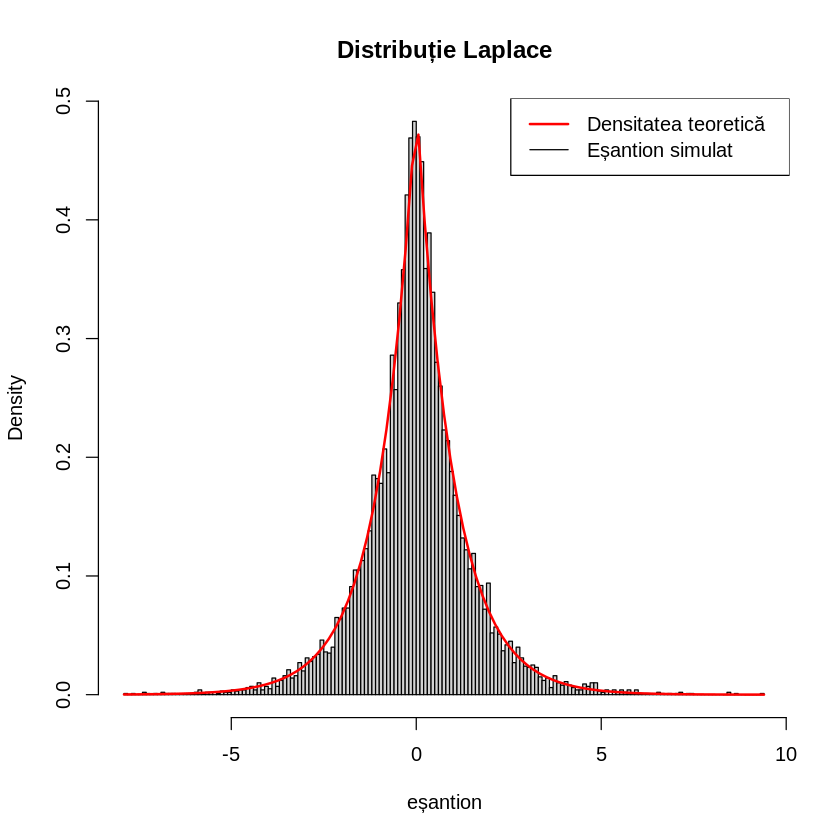

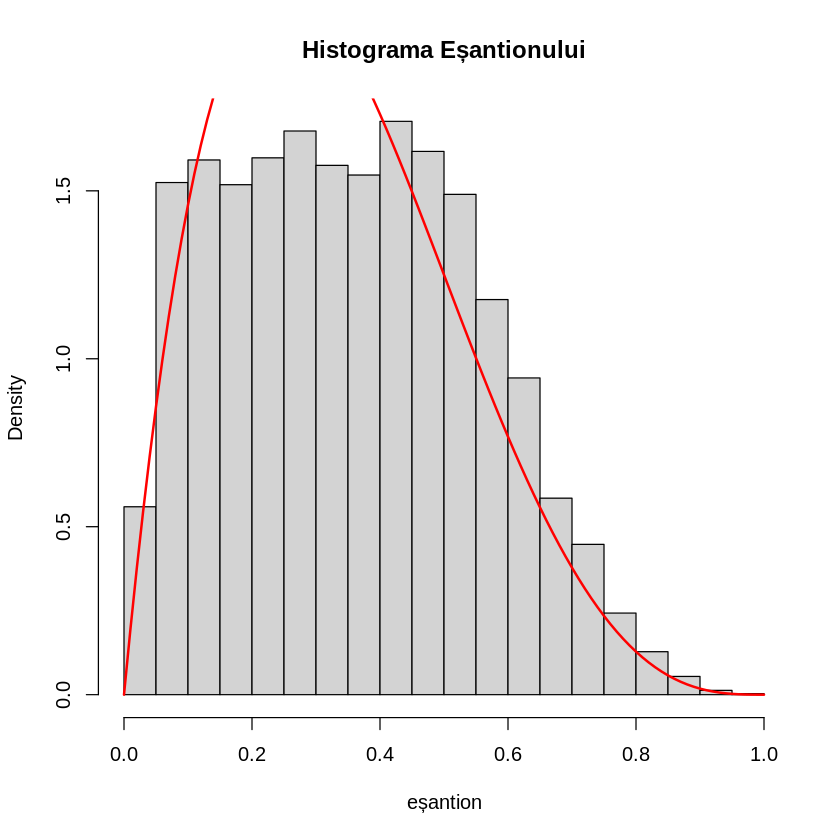

In [ ]:
# TEST 2 STATISTICA ANUL TRECUT

# 1.1. Spunem ca o v.a. X este repartizata Laplace (dublu exponentiala) de parametri -inv < alpha < inf si beta > 0,
# notat X ~ Laplace(alpha, beta), daca admite ca densitate de repartitie pe
#          f(x) = 1/(2*beta) * exp(-|x-alpha|/beta) 1|(x)

# a) Construiti functii pentru rlaplace, dlaplace, plaplace, qlaplace determinand expresiile lor matematice

dlaplace <- function(x, alpha, beta) {                    # Funcția de densitate dlaplace
  return(1/(2 * beta) * exp(-abs(x - alpha) / beta))
}

plaplace <- function(x, alpha, beta) {                    # Funcția de repartiție plaplace
  ifelse(x >= alpha, 1 - 0.5 * exp(-(x - alpha) / beta), 0.5 * exp((x - alpha) / beta))
}

qlaplace <- function(p, alpha, beta) {                    # Funcția inversă a repartiției qlaplace
  return(alpha - beta * sign(p - 0.5) * log(1 - 2 * abs(p - 0.5)))
}

rlaplace <- function(n, alpha, beta) {                    # Funcția de generare a eșantioanelor rlaplace
  p <- runif(n)
  return(qlaplace(p, alpha, beta))
}

# b) Construiti o functie care sa permita generarea unui esantion de volum n din repartitia Laplace(alpha, beta)

gen_Laplace <- function(n, alpha, beta) {
  return(rlaplace(n, alpha, beta))
}

# c) Testarea funcției generând un eșantion de volum n = 10000 și comparând valorile simulate cu densitatea teoretică

# Generarea eșantionului
n <- 10000
alpha <- 0  # Modifică aceste valori conform cerințelor problemei
beta <- 1   # Modifică aceste valori conform cerințelor problemei
eșantion <- gen_Laplace(n, alpha, beta)

# Compararea valorilor simulate cu densitatea teoretică
hist(eșantion,
    prob = TRUE,
    breaks = "FD",
    main = "Distribuție Laplace")

curve(dlaplace(x, alpha, beta),
      add = TRUE,
      col = "red",
      lwd = 2)

legend("topright",
       legend = c("Densitatea teoretică", "Eșantion simulat"),
       col = c("red", "black"),
       lwd = c(2, 1))


# 1.2. Folosind metoda respingerii construiti o functie care sa permita generarea unui esantion de volum n din densitatea
#               f(x) = 20*x*(1-x)^3, 0 < x < 1
# Validati algoritmul propus printr-o histograma

f <- function(x) {
  return(20 * x * (1 - x)^3)
}

# Definirea densității majore
c <- 1.8              # O valoare adecvată pentru c, putem ajusta în funcție de densitatea noastră
majorant <- function(x) {
  return(rep(c, length(x)))  # O densitate majorantă simplă
}

# Generarea eșantionului folosind metoda respingerii
n <- 10000  # Numărul de puncte
x <- runif(n, 0, 1)  # Generează n puncte uniforme pe [0,1]
y <- runif(n, 0, c)  # Generează n puncte uniforme pe [0,c]

# Alegerea punctelor potrivite conform metodei respingerii
keep <- y <= f(x)
eșantion <- x[keep]

# Histograma pentru a valida eșantionul
hist(eșantion,
     breaks = "FD",
     freq = FALSE,
     main = "Histograma Eșantionului")
curve(f, add = TRUE,
      col = "red",
      lwd = 2)


Warning message in log(x):
“NaNs produced”


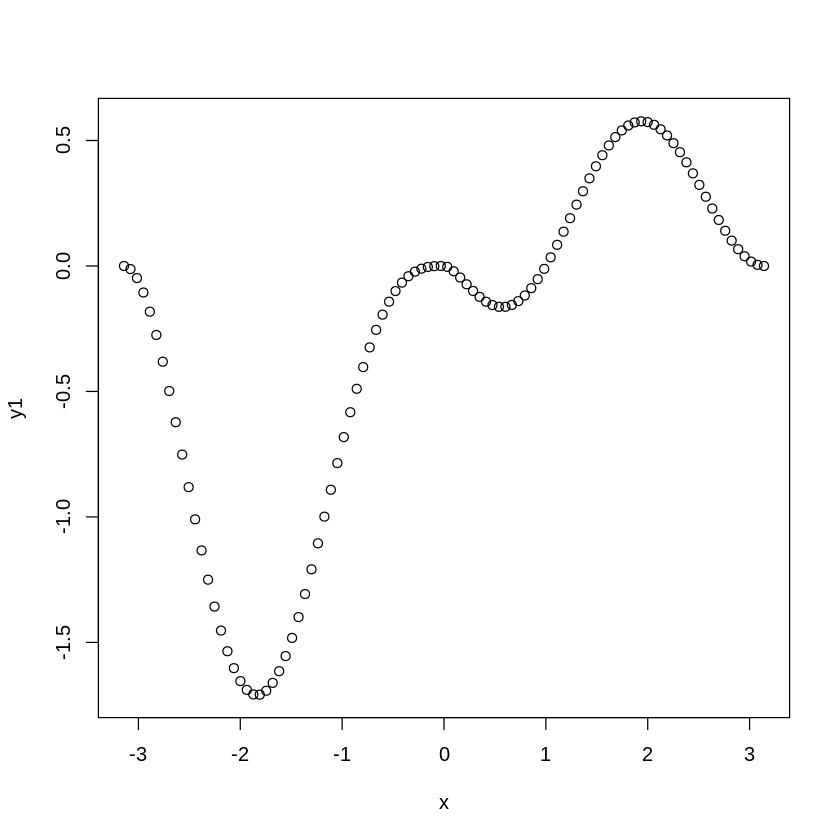

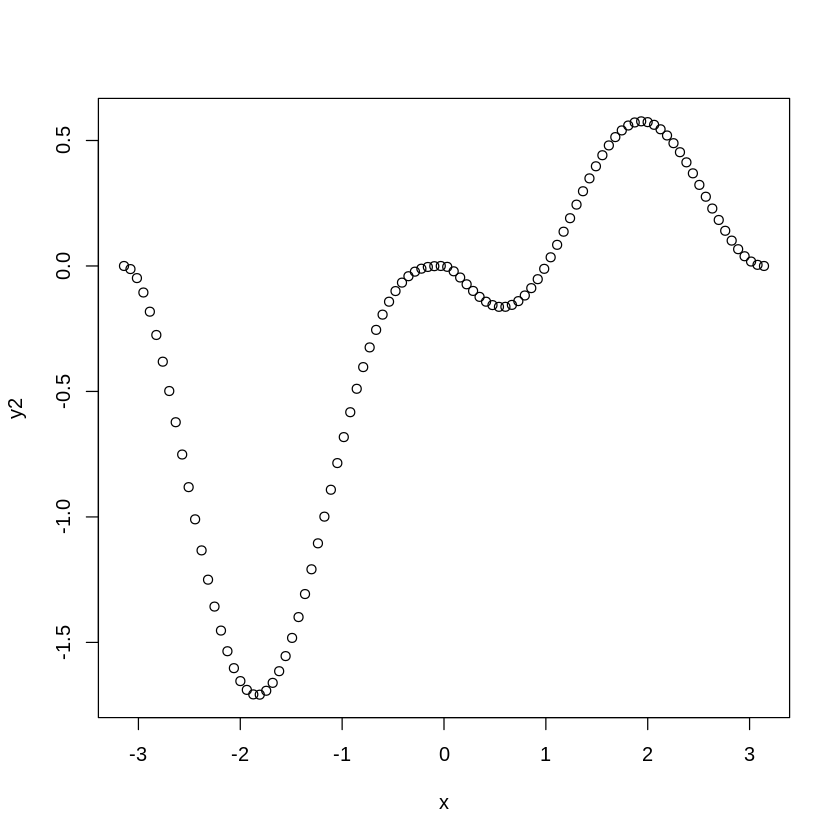

In [ ]:
#ex

g1 <- function(x){
  if(x>0){
    sin(x)^2 * log(x)
  }else{
    sin(x)^2 * x
  }
}

g1 <- Vectorize(g1, "x")

g2 <- function(x){
  ifelse(x>0, sin(x)^2*log(x), x*sin(x)^2)
}

x <- seq(-pi, pi, length.out = 100)
y1 <- g1(x)
y2 <- g2(x)
plot(x, y1)
plot(x, y2)

?Vectorize

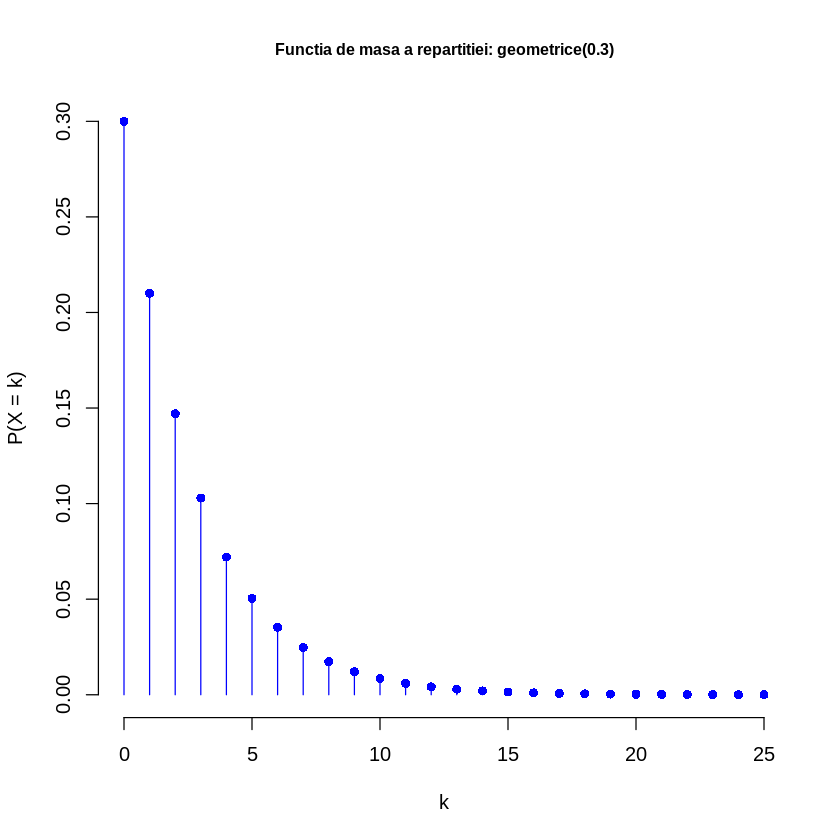

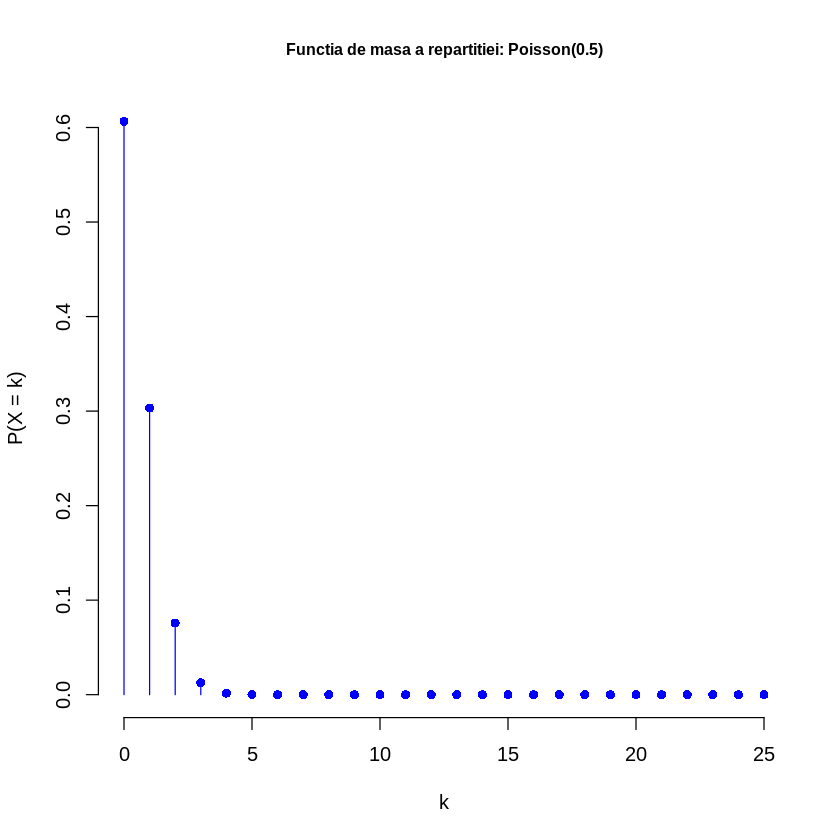

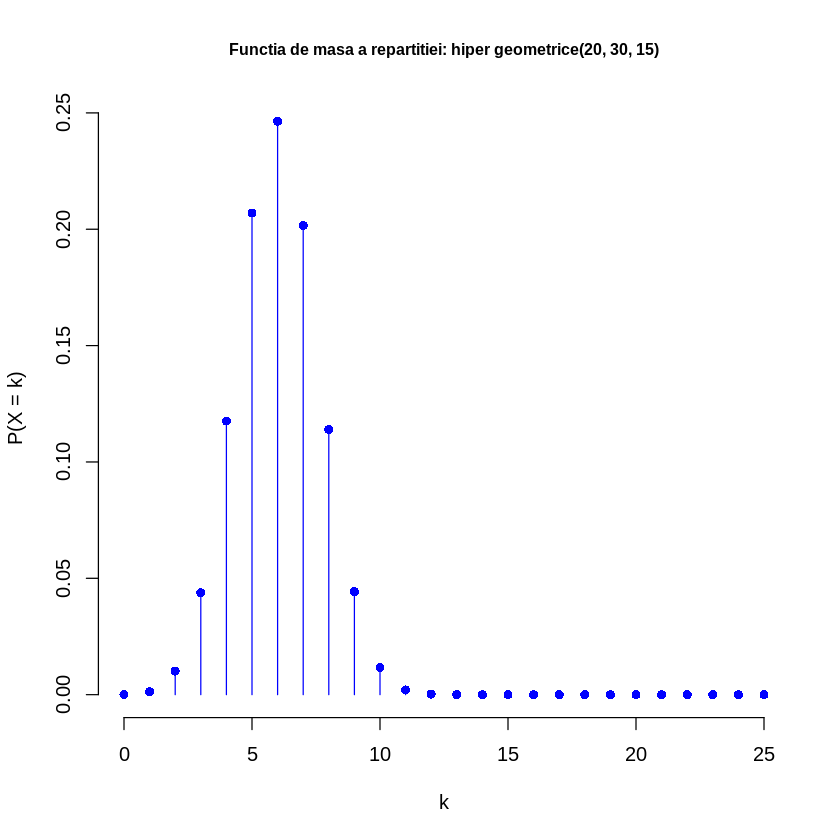

In [ ]:
#EX 1 - SITE

#%% Pentru funcția de masă avem următorul cod:
pmfPlot <- function(x = 0:25, dist = dpois(0:25, 4), title = "", ...){
  plot(x, dist,
     type = "h",
     col = 'blue',
     xlab = "k",
     ylab = "P(X = k)",
     main = paste0("Functia de masa a repartitiei: ", title),
     cex.main = 0.8,
     bty = "n")
  points(x, dist,
       pch = 16, col = 'blue')
}
# pt geom(0.3), poisson(0.5), hipergeom(20, 30, 15)

pmfPlot(x = 0:25, dist = dgeom(x = 0:25, prob = 0.3), title = "geometrice(0.3)")
pmfPlot(x = 0:25, dist = dpois(x = 0:25, 0.5), title = "Poisson(0.5)")
pmfPlot(x = 0:25, dist = dhyper(x = 0:25, m = 20, n = 30, k = 15), title = "hiper geometrice(20, 30, 15)")

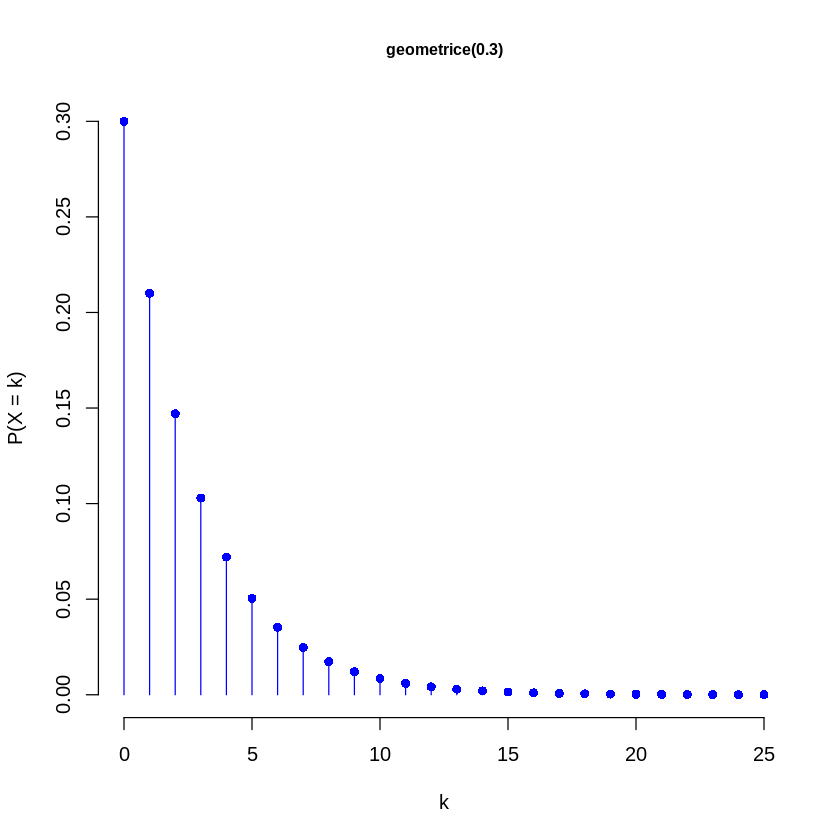

In [ ]:
x = 0:25
dist = dgeom(x = 0:25, prob = 0.3)

plot(x, dist,
     type = "h",
     col = 'blue',
     xlab = "k",
     ylab = "P(X = k)",
     main = paste0("geometrice(0.3)"),
     cex.main = 0.8,
     bty = "n")
points(x, dist,
       pch = 16,
       col = 'blue')

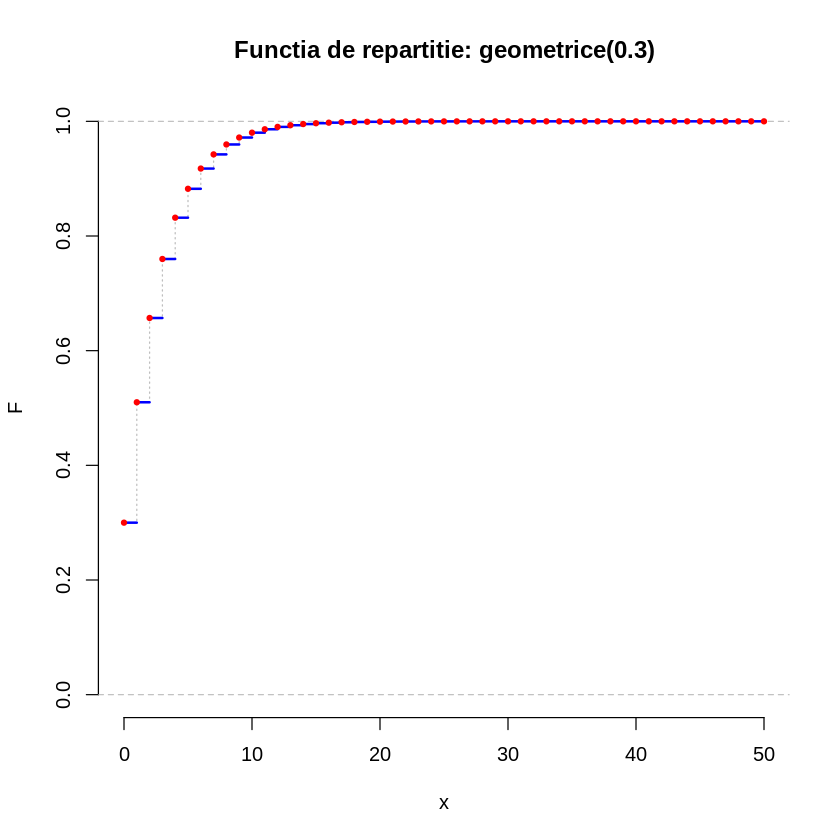

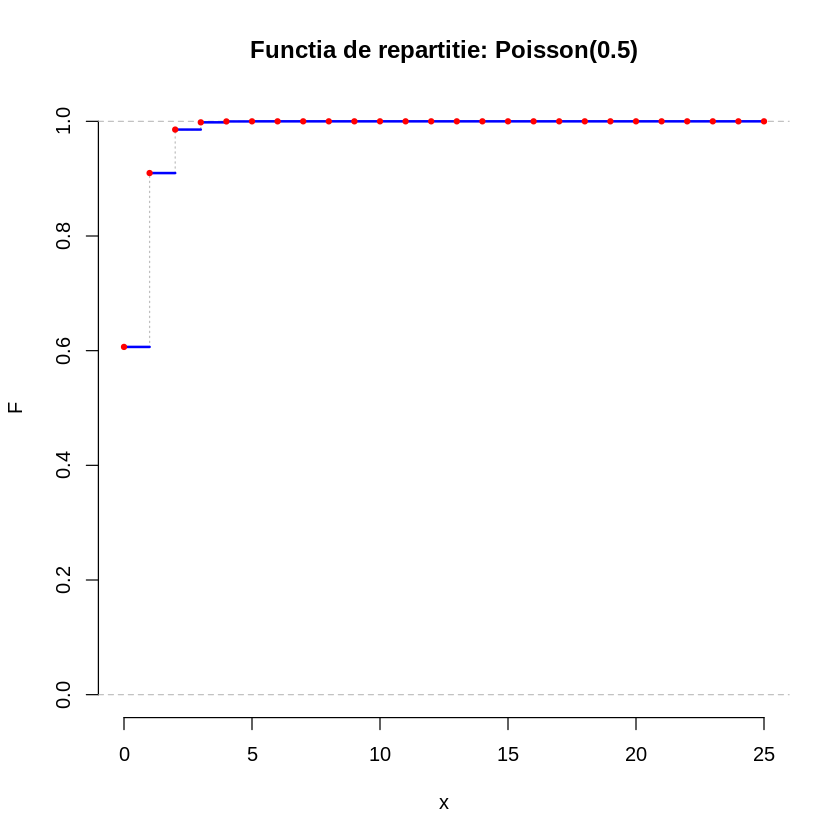

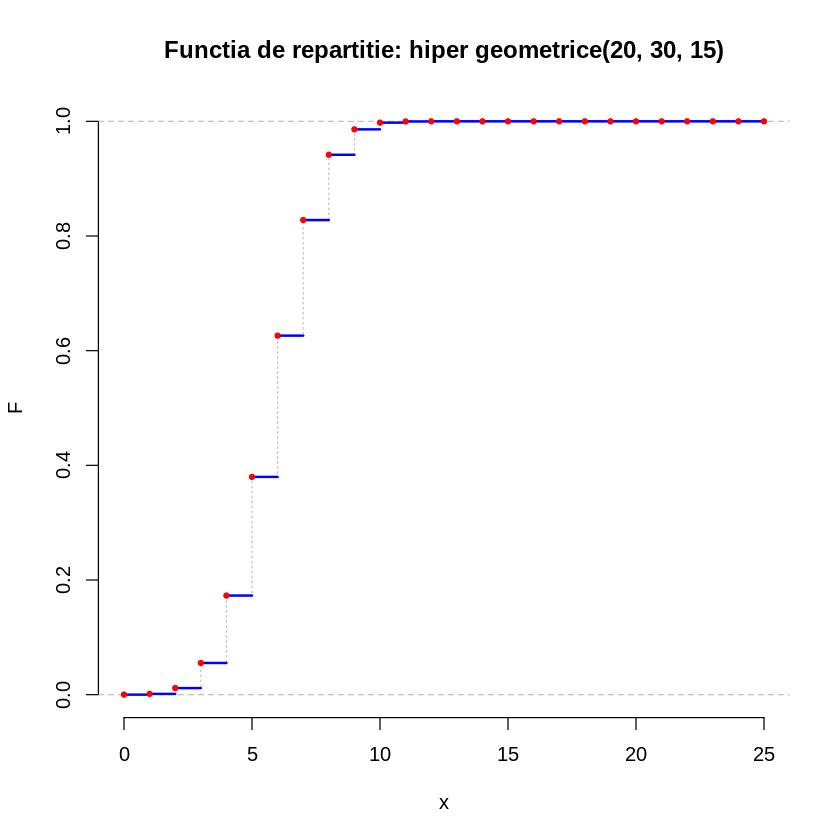

In [ ]:
#%% Pentru funcția de repartiție avem următorul cod:

cdfPlot <-  function(dist, title, err = 1e-5, ...){
  lp <-  length(dist)                                   # dist - repartitia discreta (sau discretizata)
  if (abs(sum(dist)-1) > err | sum(dist>=0) != lp){
    stop("Eroare: vectorul de probabilitati nu formeaza o repartitie")
  }else{
    x <-  0:(lp-1)                                      # ia valori in 1:lp
    cp <-  cumsum(dist)
    plot(x, cp, type = "s", lty = 3,
         xlab = "x",
         ylab = "F",
         main = paste("Functia de repartitie:", title),
         ylim = c(0,1),
         col = "grey",
         bty = "n",
         ...)
    abline(h = 0, lty = 2, col = "grey")
    abline(h = 1, lty = 2, col = "grey")
    for(i in 1:(lp-1)){
      lines(c(x[i], x[i+1]), c(cp[i], cp[i]),
            col = 'blue',
            lwd = 2)
    }
    points(x,cp, col = 'red', pch = 20, cex = 0.85)
  }
}

cdfPlot(dist = dgeom(x = 0:50, prob = 0.3), title = "geometrice(0.3)", err = 1e-5)
cdfPlot(dist = dpois(x = 0:25, 0.5), title = "Poisson(0.5)", err = 1e-5)
cdfPlot(dist = dhyper(x = 0:25, m = 20, n = 30, k = 15), title = "hiper geometrice(20, 30, 15)", err = 1e-5)

,Binomiala,Poisson,Eroarea Absoluta
,<dbl>,<dbl>,<dbl>
0,0.3486784401,3.678794e-01,1.920100e-02
1,0.3874204890,3.678794e-01,1.954105e-02
2,0.1937102445,1.839397e-01,9.770524e-03
3,0.0573956280,6.131324e-02,3.917612e-03
4,0.0111602610,1.532831e-02,4.168049e-03
5,0.0014880348,3.065662e-03,1.577627e-03
6,0.0001377810,5.109437e-04,3.731627e-04
7,0.0000087480,7.299195e-05,6.424395e-05
8,0.0000003645,9.123994e-06,8.759494e-06


,Binomiala,Poisson,Eroarea Absoluta
,<dbl>,<dbl>,<dbl>
0,3.660323e-01,3.678794e-01,1.847100e-03
1,3.697296e-01,3.678794e-01,1.850196e-03
2,1.848648e-01,1.839397e-01,9.250982e-04
3,6.099917e-02,6.131324e-02,3.140744e-04
4,1.494171e-02,1.532831e-02,3.865952e-04
5,2.897787e-03,3.065662e-03,1.678749e-04
6,4.634508e-04,5.109437e-04,4.749287e-05
7,6.286346e-05,7.299195e-05,1.012850e-05
8,7.381694e-06,9.123994e-06,1.742300e-06


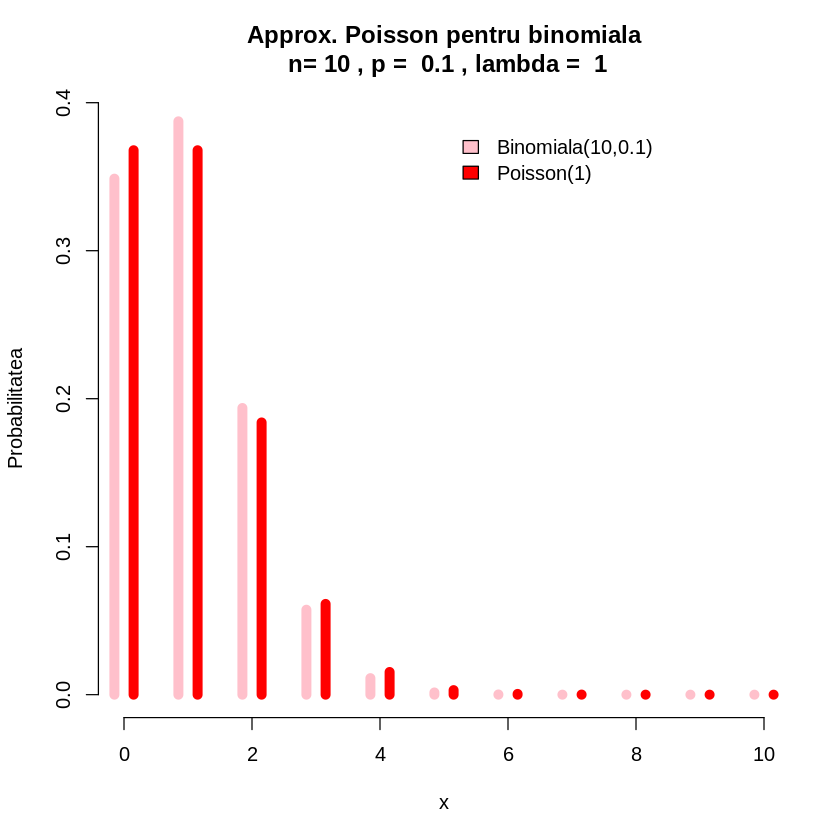

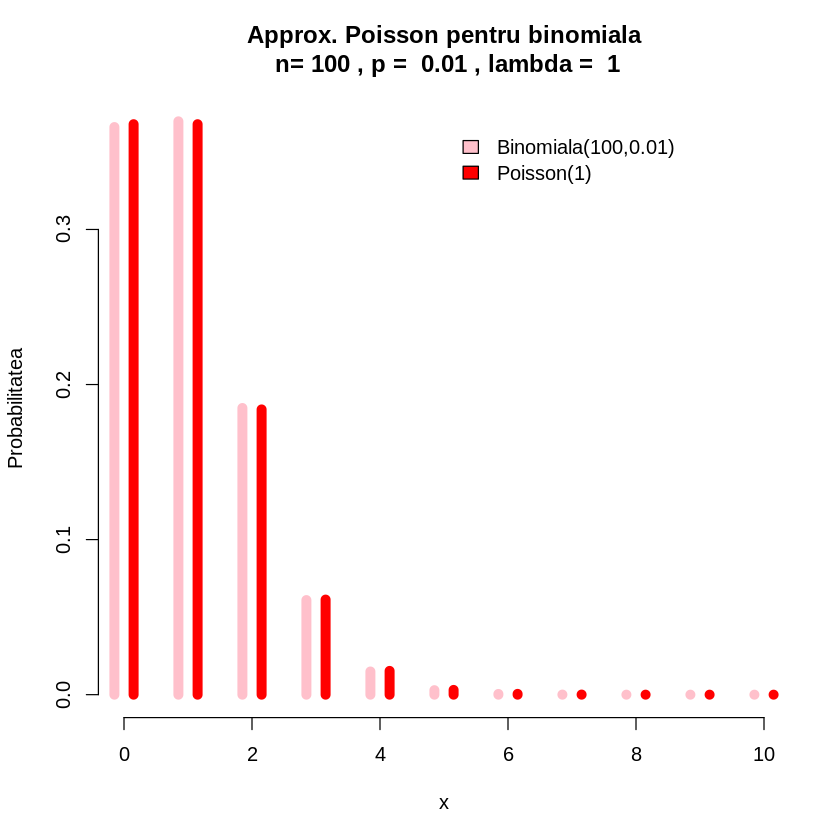

In [ ]:
### Ilustrați grafic aproximarea Poisson și normală a repartiției binomiale.

AppBP <-  function(n,p,a,b){
    lambda <- n*p
    x <- matrix(numeric((b-a+1)*3), ncol=3,
               dimnames = list(a:b,c("Binomiala","Poisson","Eroarea Absoluta")))
    x[,1] <- dbinom(a:b,n,p)
    x[,2] <- dpois(a:b,lambda)
    x[,3] <- abs(x[,1]-x[,2])
    error <- max(abs(x[,3]))
    return(list(x = as.data.frame(x), error = error, param = c(n, p, lambda)))}

# Functie care ilustreaza aproximarea Binomial vs. Poisson

pl <-  function(n,p,a,b){
    clr = c('pink', 'red')# culori
    lambda = n*p
    mx = max(dbinom(a:b,n,p))

    plot(c(a:b,a:b), c(dbinom(a:b,n,p), dpois(a:b,lambda)), type="n",
         main = paste("Approx. Poisson pentru binomiala\n n=",
                      n, ", p = ", p, ", lambda = ",lambda),
         ylab = "Probabilitatea", xlab="x",
         bty = "n")

    points((a:b)-.15, dbinom(a:b,n,p), type = "h",
           col = clr[1], lwd = 8)
    points((a:b)+.15, dpois(a:b,lambda), type = "h",
           col = clr[2], lwd = 8)

    legend(b-b/2, mx, legend = c(paste0("Binomiala(",n,",",p,")"),
                               paste0("Poisson(",lambda,")")),
           fill = clr, bg="white",
           bty = "n")
}

n = 10
p = 0.1
a = 0
b = 10
AppBP(n,p,a,b)
pl(n,p,a,b)

n = 100
p = 0.01
a = 0
b = 10
AppBP(n,p,a,b)
pl(n,p,a,b)

In [ ]:
# Următorul cod crează o funcție care calculează cele trei aproximări pentru funcția de repartiție binomială:
# 1. aproximarea normală fara coeficient de corecție de continuitate
# 2. aproximarea normală cu coeficient de corecție de continuitate
# 3. aproximarea Poisson

appBNP <- function(n, p, R = 1000, k = 6) {
  trueval <- pbinom(k, n, p) # adevarata valoare a functiei de repartitie in k
  prob.zcc <- prob.zncc <- prob.pois <- NULL  # initializare
  q <- 1-p
  for (i in 1:R) {# repetam procesul de R ori
    x <- rnorm(n, n * p, sqrt(n * p * q)) # generare n v.a. normale de medie np
    z.cc <- ((k + .5) - mean(x))/sd(x) # cu coeficient de corectie
    prob.zcc[i] <- pnorm(z.cc)
    z.ncc <- (k - mean(x))/sd(x) # fara coeficient de corectie
    prob.zncc[i] <- pnorm(z.ncc)
    y <- rpois(n, n * p)
    prob.pois[i] <- length(y[y <= k])/n # aproximate Poisson
    }
  list(prob.zcc = prob.zcc, prob.zncc = prob.zncc,
       prob.pois = prob.pois, trueval = trueval)}

n = 100
p = 0.01
appBNP(n, p, R = 1000, k = 6)

[1] 0.8

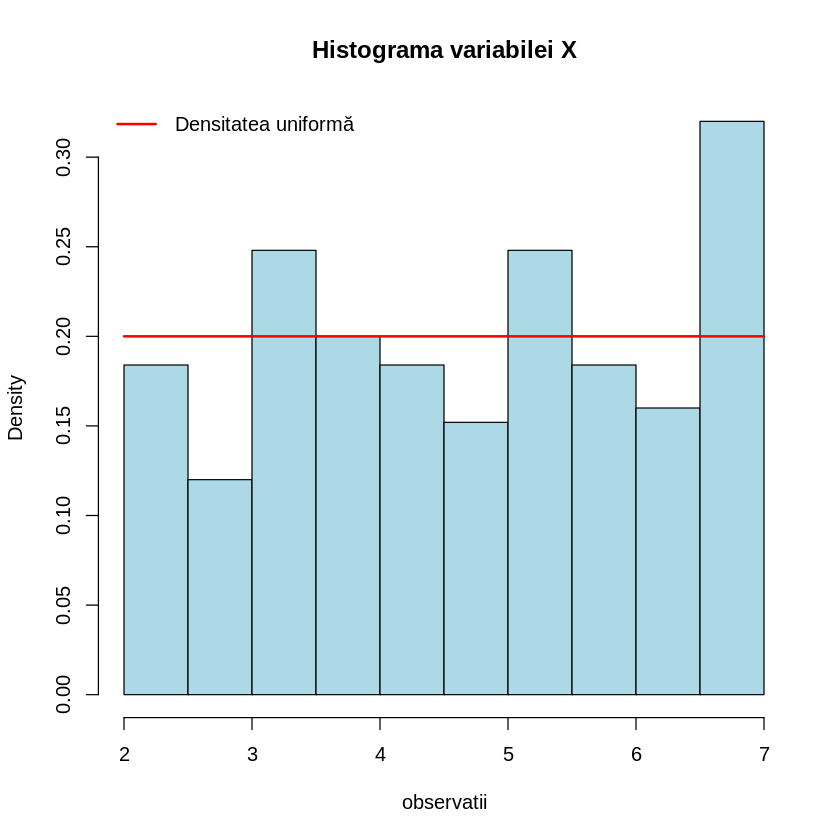

In [ ]:
# Fie o variabilă aleatoare repartizată uniform pe [2, 7]. Determinați:
# 1. P(X apartine{1, ..., 7})
# 2. P(X<3) și P(X<=3)
# 3. P(X<=3 reunit cu X>4)
# 4. Generați de observații din repartiția dată, trasați histograma acestora și suprapuneți densitatea repartiției date

#unif(min = 2, max = 7)            # uniforma continua

#prob1 <- 0
prob2si3 <- (3-2)/(7-2)
prob4 <- 1 - (4-2)/(7-2)
prob4n <- prob4 + prob2si3
prob4n
# Generăm 250 de observații din distribuția uniformă pe intervalul [2, 7]
observatii <- runif(250, min = 2, max = 7)

# Trasează histograma pentru observații și suprapune densitatea uniformă
hist(observatii, probability = TRUE, col = "lightblue", main = "Histograma variabilei X")
curve(dunif(x, min = 2, max = 7), add = TRUE, col = "red", lwd = 2)
legend("topleft", legend = c("Densitatea uniformă"), col = c("red"), lwd = c(2), bty = "n")


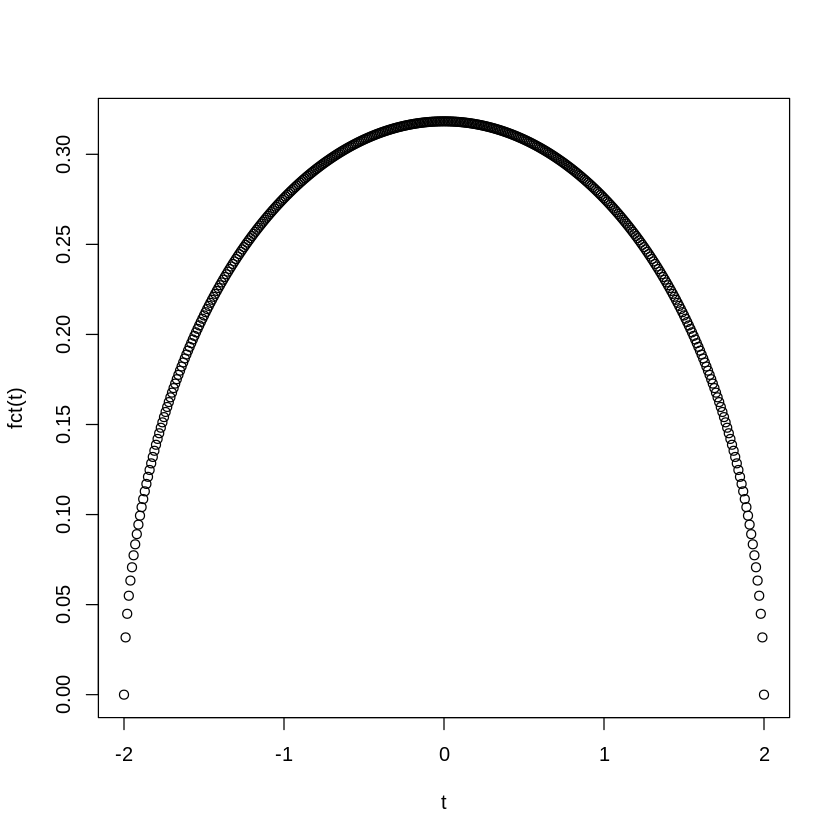

In [ ]:
t <- seq(-2, 2, 0.01)
fct <- function(x){
  return(1/(2*pi) * sqrt(4-x^2))
}

plot(t, fct(t))

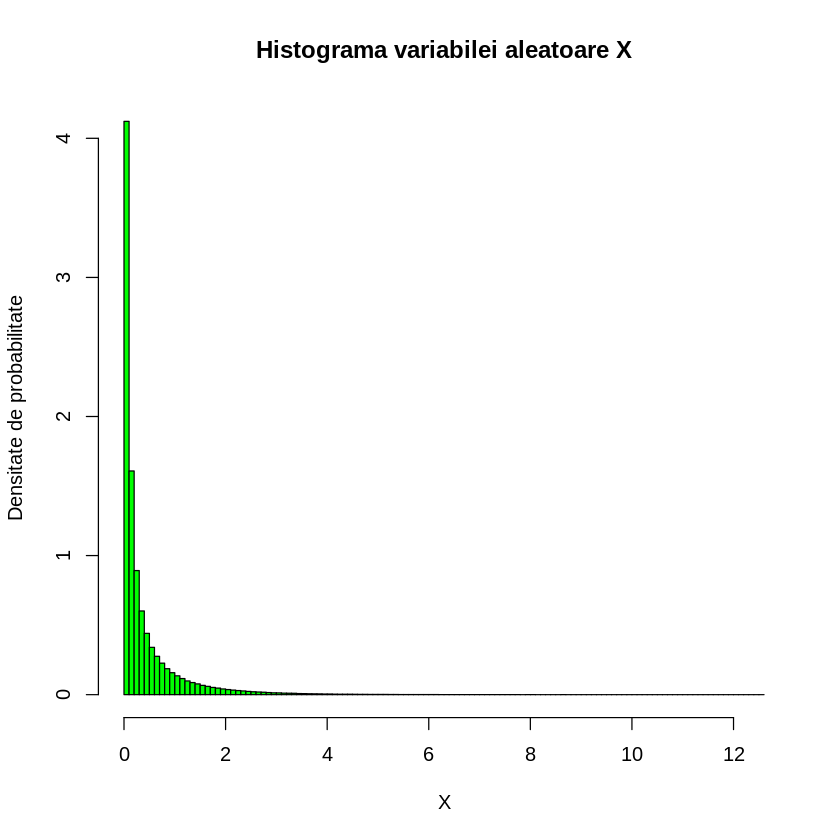

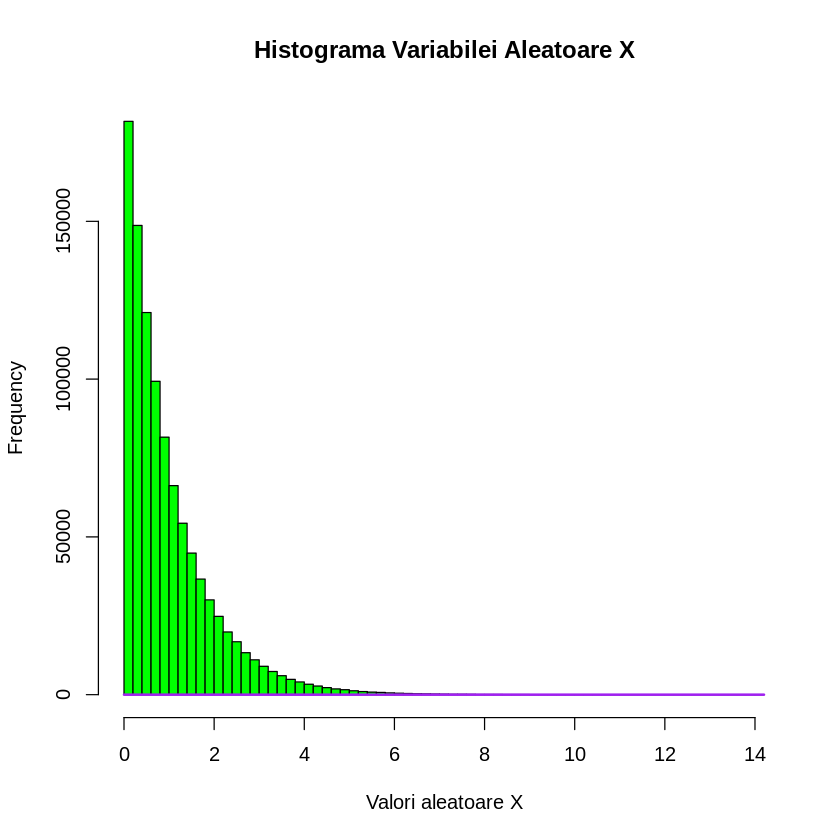

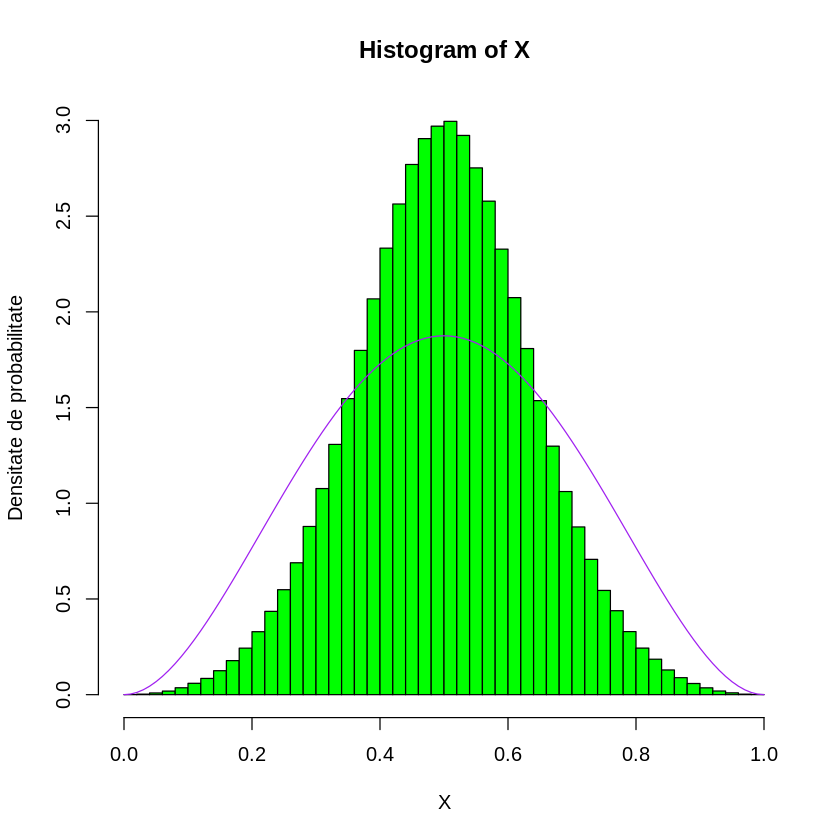

Covarianța dintre U^2 și sqrt(1 - U^2): -0.06541576 


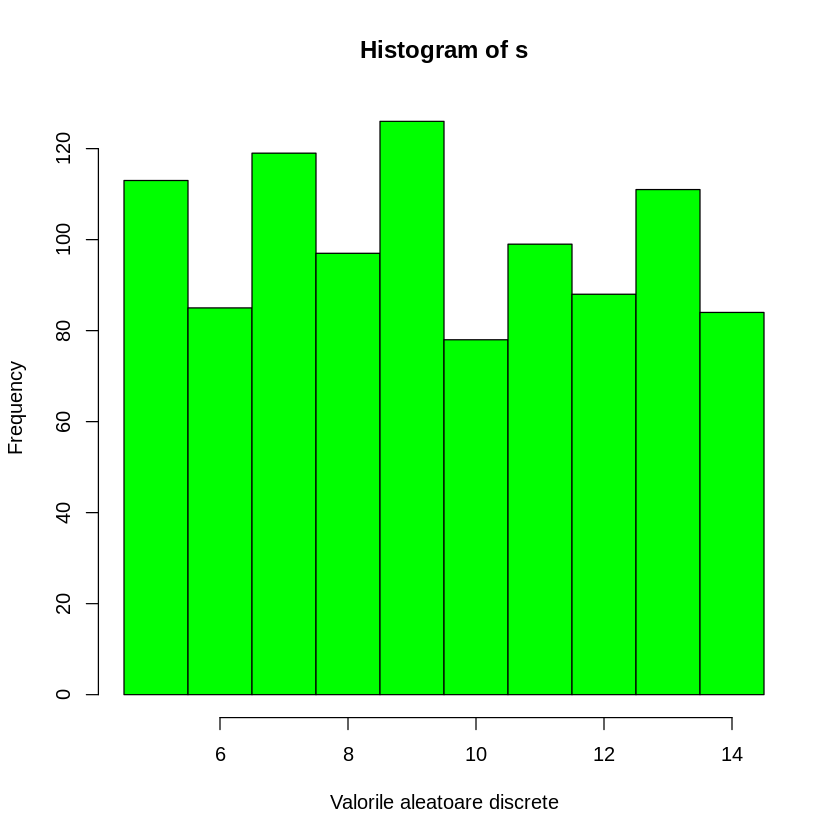

In [ ]:
#Test Statistica

#Exercitiul 1

#a
a <- 2.0
m <- runif(10^6, 0, a)

fct_inv <- function(y) {
  return(-log(1 - exp(-a * y)))
}
x<- fct_inv(m)

hist(x, breaks = 100, prob = TRUE, col = 'green', main = 'Histograma variabilei aleatoare X', xlab = 'X', ylab = 'Densitate de probabilitate')

#b
a <- 2
lambda <- 1
Yg <- function(n) {
  U <- runif(n)
  return(-1/lambda * log(U))
}

f<- function(x) {
  return((exp(-x) / (1 - exp(-a))) * a)
}
Xg <- function(n) {
  Y <- Yg(n)
  U <- runif(n)
  accepted <- U <= f(Y) / (lambda * exp(-Y))
  return(Y[accepted])
}

s <- Xg(10^6)

hist(s, breaks = 100, col = "green", main = "Histograma Variabilei Aleatoare X", xlab = "Valori aleatoare X")
curve(f(x), add = TRUE, col = "purple", lwd = 2)


#Exercitiul 2
a <- 3
b <- 3
n <- 10^6

U1 <- runif(n)
U2 <- runif(n)
Y1 <- (-log(U1))^(1/a)
Y2 <- (-log(U2))^(1/b)

X <- Y1 / (Y1 + Y2)

hist(X, breaks = 50, prob = TRUE, col = "green", xlab = "X", ylab = "Densitate de probabilitate")

curve(dbeta(x, shape1 = a, shape2 = b), add = TRUE, col = "purple", lwd = 1)

#Exercitiul 3

Pi <- 0.11
Pp <- 0.09
j <- seq(5, 14, by = 1)
probabilities <- ifelse(j %% 2 == 1, Pi, Pp)

s <- sample(j, size = 1000, replace = TRUE, prob = probabilities)

hist(s, breaks = seq(4.5, 14.5, by = 1), col = "green", xlab = "Valorile aleatoare discrete")


#Exercitiul 4
n<- 10^6
U <- runif(n)
Up <- U^2
Up2 <- sqrt(1 - U^2)
m<- cbind(Up, Up2)
cov <- cov(m)[1, 2]
cat("Covarianța dintre U^2 și sqrt(1 - U^2):", cov, "\n")

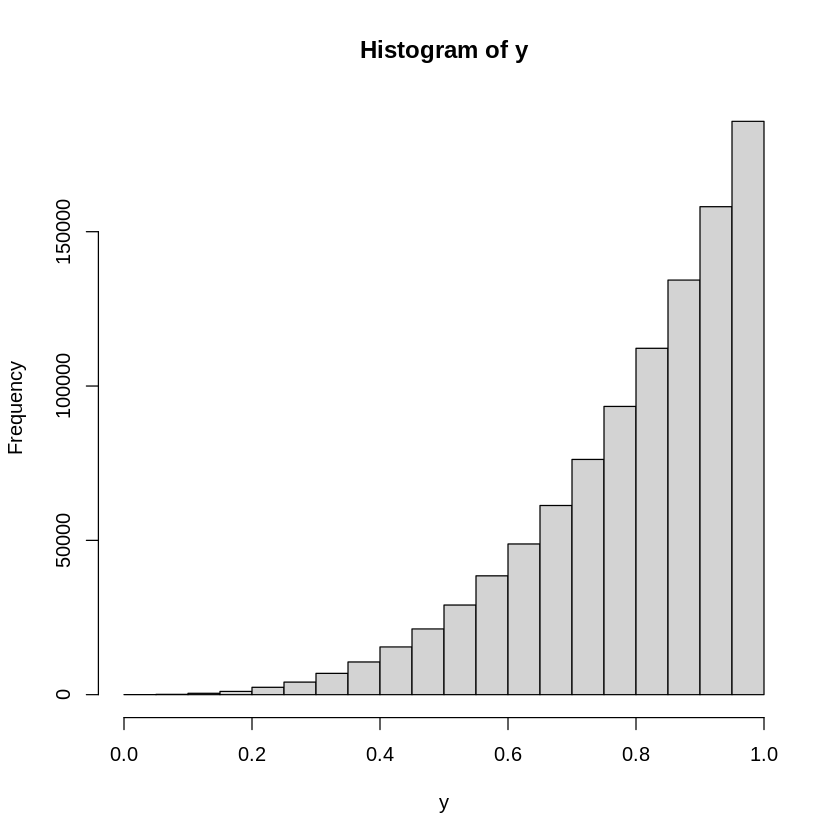

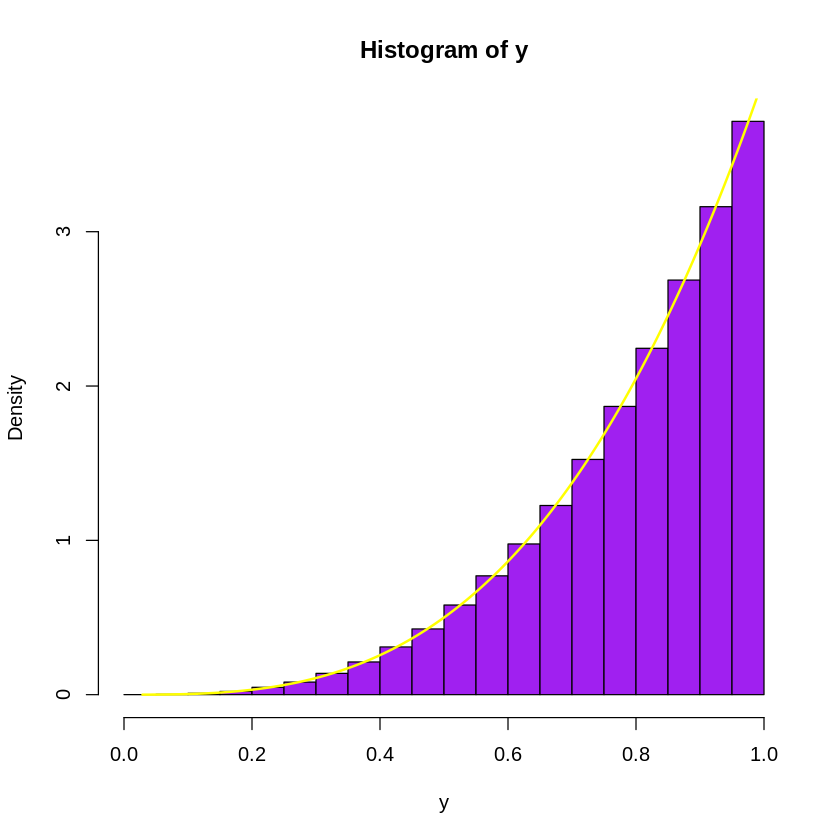

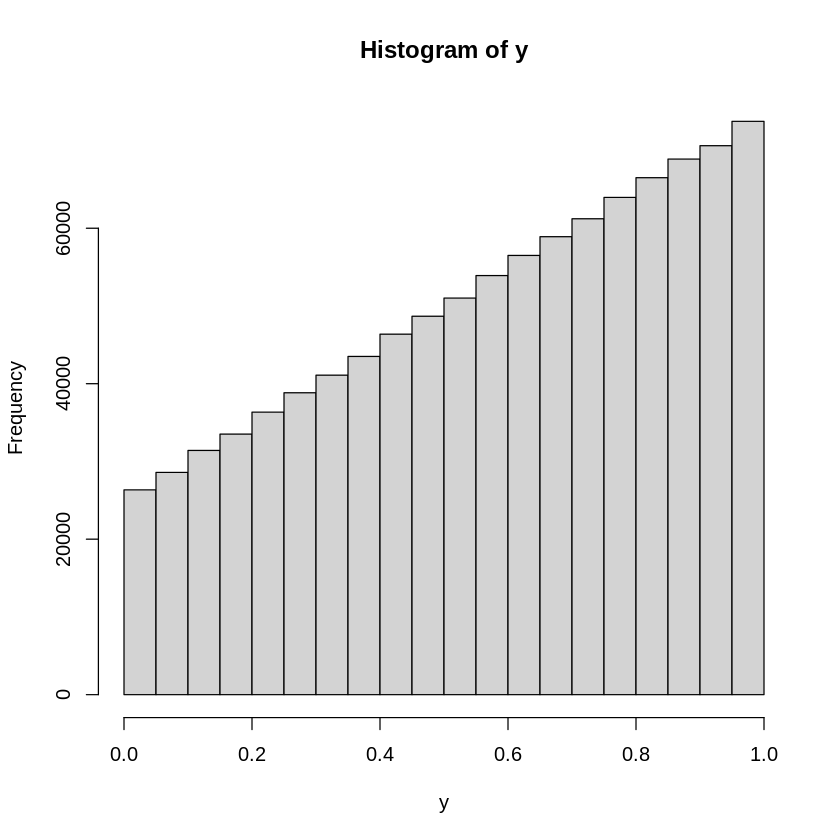

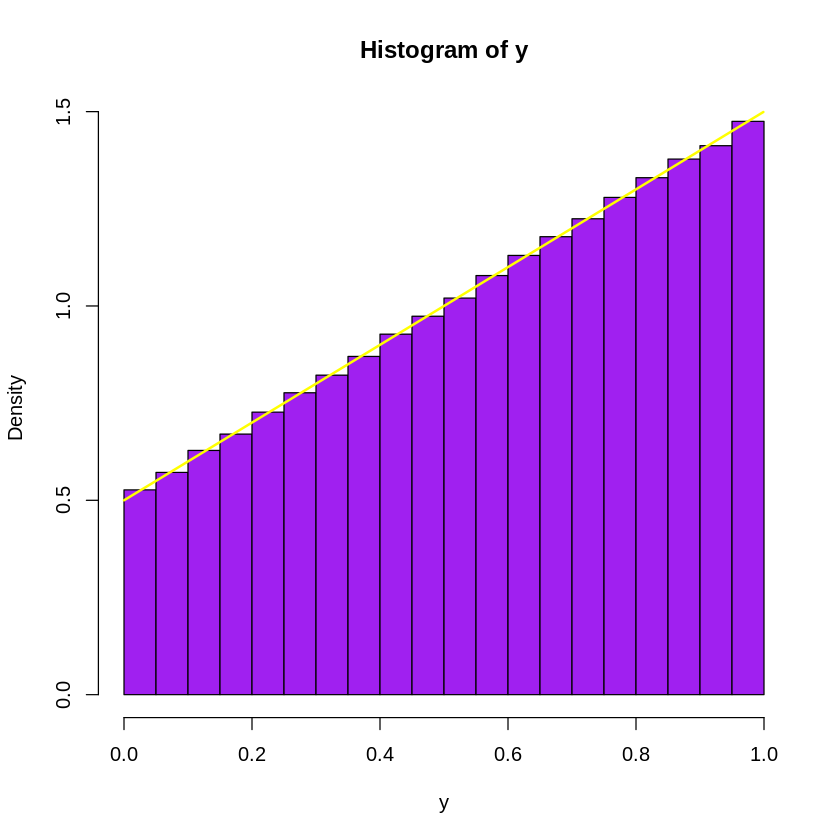

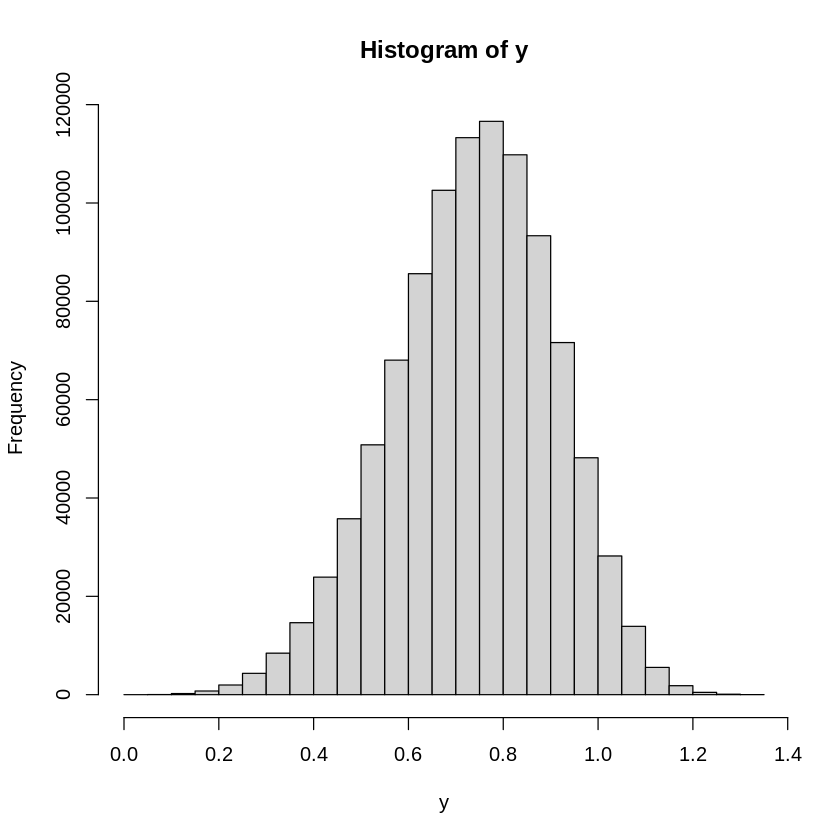

Warning message in sqrt(log(u)^(b)):
“NaNs produced”


ERROR: ignored

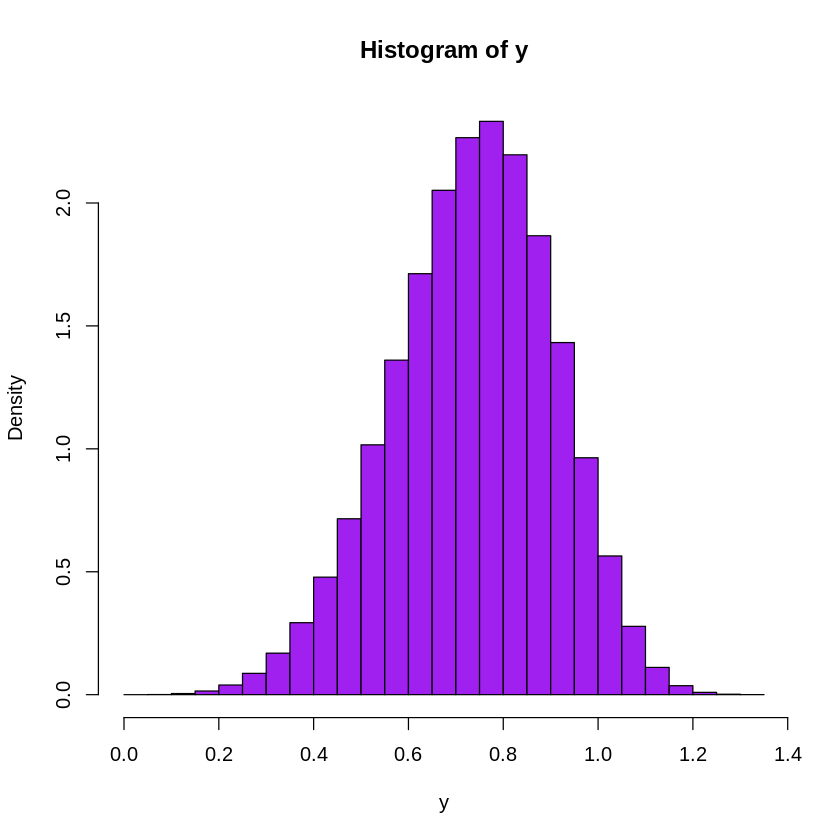

In [ ]:
#exc 1
exc_1 <- function(n,k)
{
  u = runif(n)  #generăm un vector uniform
  x <- u^(1/k)  #funcția găsită pentru exc 1
  return(x)
}
#afișăm și derivata să vedem cât de asemănătoare e histograma
dF1 <- function(x,k)
{
  x <- k*x^(k-1)
}

n <- 10^6
k <- 4  #dăm o valoare pentru a vedea histograma
y <- exc_1(n,k)
hist(y)
hist(y, col = 'purple', freq = F)
t <- seq(min(y),max(y),0.001)
lines(t,dF1(t,k),col='yellow',lwd = 2)

#exc 2
exc_2 <- function(n,k)
{
  u = runif(n)  #generăm un vector uniform
  x <- (-1+(1+8*u)^(1/2))/2  #funcția găsită pentru exc 2
  return(x)
}
#afișăm și derivata să vedem cât de asemănătoare e histograma
dF2 <- function(x,k)
{
  x <- x+1/2
}

n <- 10^6
y <- exc_2(n,k)
hist(y)
hist(y, col = 'purple', freq = F)
t <- seq(min(y),max(y),0.001)
lines(t,dF2(t,k),col='yellow',lwd = 2)

#exc 3
exc_3 <- function(n,k,a,b)
{
  u = runif(n)  #generăm un vector uniform
  x <- (log(u)/-a)^(1/b)  #funcția găsită pentru exc 3
  return(x)
}

n <- 10^6
a <- 3
b <- 5
y <- exc_3(n,k,a,b)
hist(y)
hist(y, col = 'purple', freq = F)

#exc 5 se produc valori not a number în funcție.
exc_5 <- function(n,b)
{
  u = runif(n)  #generăm un vector uniform
  x <- sqrt(log(u)^(b))   #funcția găsită pentru exc 5
  return(x)
}

n <- 10^6
b <- 3
y <- exc_5(n,b)
hist(y)
hist(y, col = 'purple', freq = F)


#exc 6 aici cred că trebuie luat altfel u pentru a rămâne în domeniu
exc_6 <- function(n,k)
{
  u = runif(n)  #generăm un vector uniiform
  x <- tan(pi*(u-1/2))
  return(x)
}

n <- 10^6
y <- exc_6(n,k)
hist(y)
hist(y, col = 'purple', freq = F)

[1] 57834

[1] 59.72677

[1] 258743

[1] 59.72677

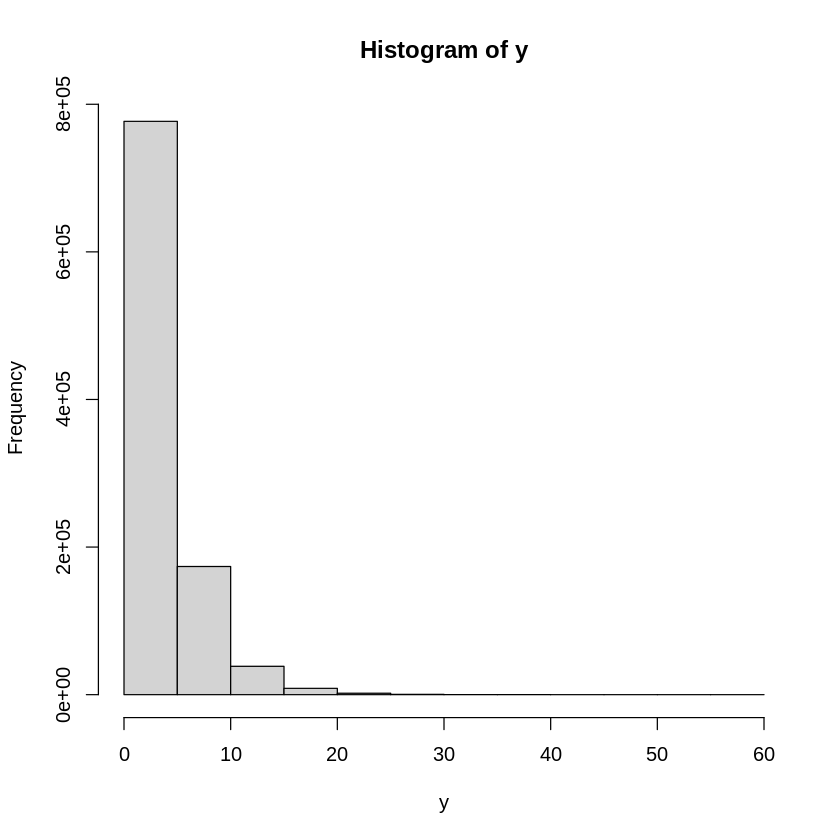

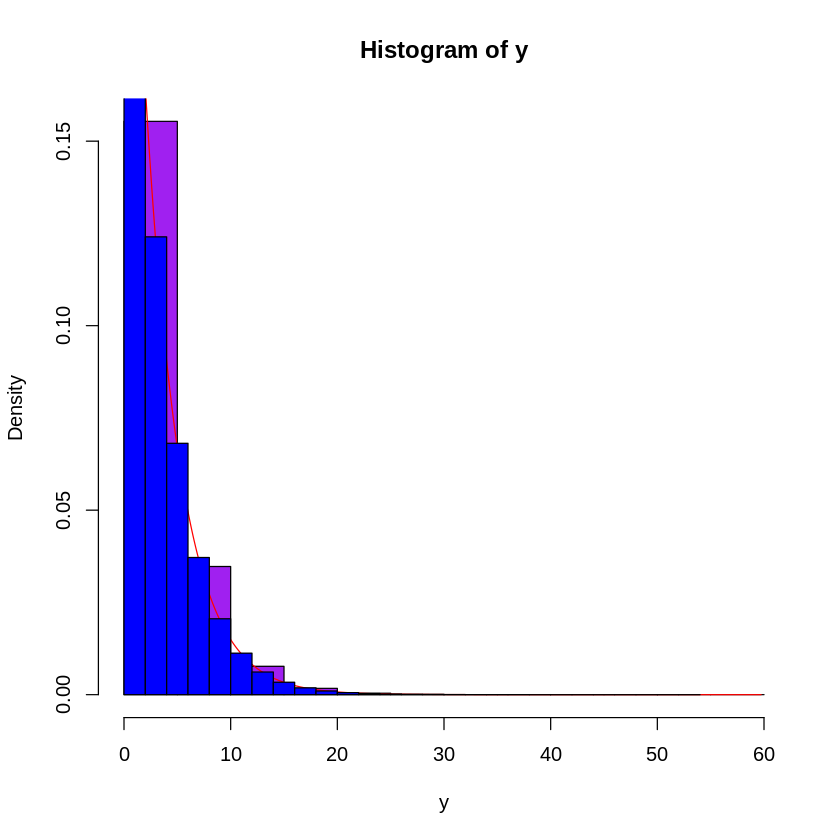

In [ ]:
  #Simularea unei valori dintr-o exponentiala de parametru lambda

  lambda <- 4
  u <- runif(1)       #r vine de la random și u generează n valori
  x <- -1/lambda*log(u)

  #-----------------------------------------------------------
  #Scrieti o functie ce genereaza n valori din Exp(lambda)
  expo_lambda <-function(n,lambda)
  {
    u <- runif(n)    #pt fiecare x am nevoie de un u, deci generăm un vector
    x <- -1/lambda*log(u)
    return(x)
  }

  #Vizualizam valorile generate prin intermediul unei histograme
  lambda <- 0.3
  n <- 10^6
  y <- expo_lambda(n,lambda)

  #Cate valori am cuprinse intre 0 si 0.2
  length(y[(y<=0.2)&(y>=0)])
  max(y)

  #Cate valori am cuprinse intre 0 si 10
  length(y[(y<=1)&(y>=0)])
  max(y)
  hist(y)
  hist(y,col="purple",freq=F)
  #col de la colour

  t <- seq(min(y),max(y),0.001)
  lines(t,dexp(t,lambda),col="red")
  y1 <- rexp(n,lambda)
  #hist(y1)
  hist(y1,add=T,col="blue",freq=F)

  #facem histograma valorilor, și suprapunem cu lines ca să ne verificăm
  #dexp dă densitatea

  #TEMA: Construiti un algoritm care simuleaza 10^6 valori din repartitia
  #lucrata in exemplul cu metoda inversa

  # Algoritmul pentru simularea unei valori dintr-o variabila aleatoare
  #discreta X:(1 2 3 4 5;10/30 1/30 4/30 7/30 8/30)
  val <- 1:5
  prob <- c(1/3,1/30,2/15,7/30,4/15)
  u <- runif(1)
  if (u<prob[1]) { x=val[1]
  } else if (u<prob[1]+prob[2]) {x=val[2]
  }else {if (u<prob[1]+prob[2]+prob[3]) x=val[3]
  else  if (u<prob[1]+prob[2]+prob[3]+prob[4]) x=val[4]
  else x=val[5]
  }

  prob_partiale <- cumsum(prob)


In [ ]:
# atunci cand moneda este echilibrata

ban <- sample(c("H","T"), 10000, replace = TRUE)
table(ban)/length(ban)

ban <- sample(c("H","T"), 10000, replace = TRUE, prob = c(0.2, 0.8))
table(ban)/length(ban)


ban
     H      T 
0.5077 0.4923 

ban
     H      T 
0.1982 0.8018 

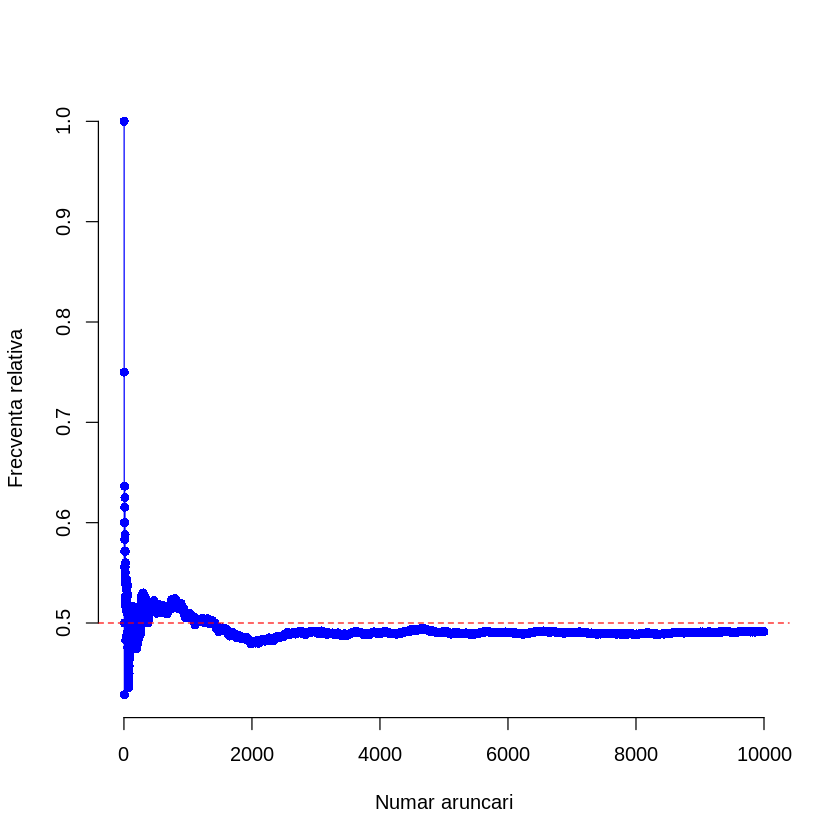

In [ ]:
# Putem vedea cum evoluează această frecvență relativă în funcție de numărul de aruncări

N <- 10000
ban <- sample(c("H","T"), N, replace = TRUE)

# sirul frecventelor relative
y <- cumsum(ban == "H")/(1:N)

plot(1:N, y, type = "o", col = "blue", bty = "n",
     xlab ="Numar aruncari", ylab = "Frecventa relativa",
     ylim = c(min(y), max(y)), pch = 16)
abline(h = 0.5, lty = 2, col = "red")

O familie are doi copii. Care este probabilitatea ca ambii copii să fie băieți știind că cel puțin unul dintre copii este băiat?
Care este probabilitatea ca ambii copii să fie băieți știind că cel mai tânăr este băiat?

In [ ]:
N <- 10^5

copil1 <- sample(c("baiat", "fata"), N, replace = TRUE)
copil2 <- sample(c("baiat", "fata"), N, replace = TRUE)
# Fie A evenimentul ca ambii copii să fie băieți și B evenimentul prin care cel mai tânăr este băiat
nB <- sum(copil2 == "baiat")
nAB <- sum(copil1 == "baiat" & copil2 == "baiat")

p2 <- nAB/nB
p2
# Considerând acum C evenimentul prin care familia are cel puțin un copil băiat
nC <- sum(copil1 == "baiat" | copil2 == "baiat")

p1 <- nAB/nC
p1

[1] 0.5026133

[1] 0.3353833

O familie are doi copii. Să se determine probabilitatea ca ambii copii să fie de sex feminin, știind că cel puțin unul dintre ei este fata născută iarna. Vom presupune că avem șanse egale ca un copil să se fi născut în oricare din cele patru anotimpuri și că între sexul copilului și anotimp nu există nicio legătură.


In [ ]:


# generam N familii
N <- 10000 # numarul de repetari ale experimentului

copil1 <- sample(c("baiat-primavara", "baiat-vara", "baiat-toamna", "baiat-iarna",
                   "fata-primavara", "fata-vara", "fata-toamna", "fata-iarna"), N, replace = TRUE)
copil2 <- sample(c("baiat-primavara", "baiat-vara", "baiat-toamna", "baiat-iarna",
                   "fata-primavara", "fata-vara", "fata-toamna", "fata-iarna"), N, replace = TRUE)

# Dacă notăm cu B = {cel putin unul este FI} evenimentul cu care condiționăm, atunci frecvența de apariție acestuia este:
nB <- sum(copil1 == "fata-iarna" | copil2 == "fata-iarna")

# iar dacă A = {ambii sa fie F}, frecvența de apariție a evenimentului intersect(A, B) este:
nAB <- sum(copil1 == "fata-iarna" & (copil2 == "fata-vara" | copil2 == "fata-primavara" | copil2 == "fata-toamna" | copil2 == "fata-iarna")) +
     sum(copil2 == "fata-iarna" & (copil1 == "fata-vara" | copil1 == "fata-primavara" | copil1 == "fata-toamna"))

p_AB <- nAB/nB
p_AB

[1] 0.4629472

Să presupunem că aruncăm trei zaruri echilibrate (sau cu un zar de trei ori). Care este probabilitatea ca suma punctelor de pe fața superioară să fie egal cu 8? Care este probabilitatea ca primul zar (sau la prima aruncare) să arate mai puțin de 3 puncte dat fiind că suma punctelor de pe fețele celor trei zaruri este mai mare sau egală cu 8?

[1] 0.1005

Frecvența relativă a sumei celor trei zaruri în 10000 de repetiții ale experimentului.

[1] 0.2254197

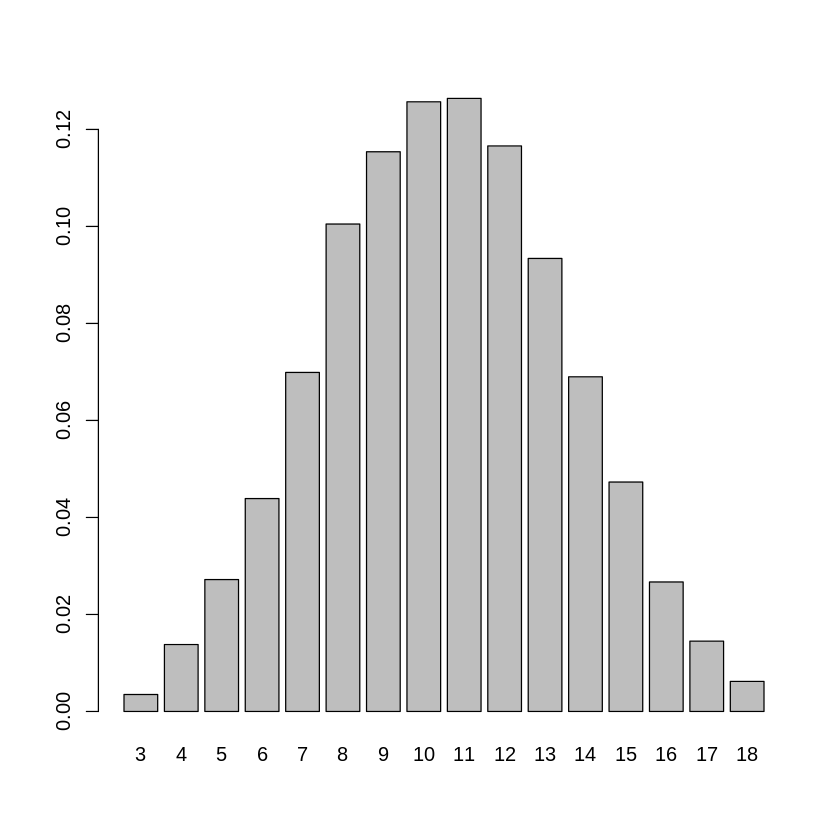

In [ ]:
prob_zar <- function(d = 3, s = 8, n = 1000){
  # d - numarul de zaruri
  # s - suma valorilor celor d zaruri
  # n - nr de repetari ale experimentului

  rez <- rep(0, n)

  # repet experimentul de n ori
  for (i in 1:n){
    x <- sample(1:6, d, replace = TRUE)
    rez[i] <- sum(x)
  }

  return(list(r1 = sum(rez == s)/n,
              r2 = table(rez)/n))

}

z <- prob_zar(3, 8, 10000)
z$r1

barplot(height = as.numeric(z$r2),
        names.arg = names(z$r2))
cat("Frecvența relativă a sumei celor trei zaruri în 10000 de repetiții ale experimentului.")

# Pentru o scriere mai compactă putem folosi funcția 'replicate':
zard <- function(d){
  return(sample(1:6, d, replace = TRUE))
}

prob_zar2 <- function(d = 3, s = 8, n = 1000){
  rez <- replicate(n, sum(rolld(d)))

 return(list(r1 = sum(rez == s)/n,
              r2 = table(rez)/n))
}

# b)Pentru partea a doua a exercițiului avem de-a face cu o probabilitate condiționată
n <- 1000

cA <- 0 # suma zarurilor
cBA <- 0 # X1 < 3 si suma >= 8
# A -> evenimentul prin care suma zarurilor este >=8
# B -> evenimentul prin care primul zar are mai puțin de 3 puncte
# vrem P(B|A)
for (i in 1:n){
  x <- sample(1:6, 3, replace = TRUE)

  if (sum(x) >= 8){
    cA <- cA + 1

    if (x[1] < 3){
      cBA <- cBA + 1
    }
  }

}

# estimarea probabilitatii
cBA/cA

Sunteți participant într-un joc televizat în care gazda vă prezintă trei uși închise. Acesta vă spune că în spatele unei uși se află o mașină iar în spatele celorlalte două se află câte o capră. Jocul decurge în felul următor: trebuie să alegeți una dintre cele trei uși; gazda, care știe în spatele cărei uși se află mașina, deschide una dintre celelalte două uși, în spatele căreia se află o capră apoi vă întreabă dacă vreți să rămâneți la alegerea inițială sau vreți să alegeți cealaltă ușă rămasă închisă. Presupunând că vreți să câștigați o mașină, ce alegere preferați?

In [ ]:
monty <- function(random = TRUE) {
  doors <- 1:3

  if (random){
    # alege aleator unde se afla masina
    cardoor <- sample(doors,1)
  }else{
    print("Scrieti numarul usii in spatele careia se afla masina:")
    cardoor = scan(what = integer(), nlines = 1, quiet = TRUE)
  }

  # Monty ii spune jucatorului sa aleaga usa
  print("Monty Hall spune ‘Alege o usa, orice usa!’")

  # alegerea jucatorului (1,2 sau 3)
  chosen <- scan(what = integer(), nlines = 1, quiet = TRUE)

  # Monty intoarce o usa cu capra (nu poate fi usa aleasa
  # de jucator si nici usa cu masina)
  if (chosen != cardoor){
     montydoor <- doors[-c(chosen, cardoor)]
  }else{
    montydoor <- sample(doors[-chosen],1)
  }

  # jucatorul schimba sau...
  print(paste("Monty deschide usa ", montydoor, "!", sep=""))
  print("Doresti sa schimbi usa (y/n)?")

  reply <- scan(what = character(), nlines = 1, quiet = TRUE)

  # ce incepe cu "y" este da
  if (substr(reply,1,1) == "y"){
    chosen <- doors[-c(chosen,montydoor)]
  }

  # Rezultatul jocului
  if (chosen == cardoor){
    print("Bravo! Ai castigat !")
  }else{
    print("Pacat! Ai pierdut!")
  }
}

monty()

Să ne imaginăm că 20 de persoane merg la operă și că fiecare persoană poartă o pălărie. În momentul în care ajung la intrare își lasă pălăria la garderobă. Pe parcursul reprezentării artistice, persoana responsabilă cu garderoba se încurcă, pierde lista cu numerele locațiilor și returnează în mod aleator pălăriile persoanelor la plecare. Care este probabilitatea ca cel puțin o persoană să fi primit pălăria cu care a venit?

In [ ]:
# repetam experimentul de un nr mare de ori
m <- 10000

# nr de persoane
n <- 20

n.potriviri <- rep(0, m)

persoane <- 1:n

for (i in 1:m){
  palarii <- sample(1:n, n)
  n.potriviri[i] <- sum(palarii == persoane)
}

# proportia persoanelor cu cel putin o potrivire
sum(n.potriviri > 0) / m

[1] 0.6293

Un bărbat vrea să își cumpere un obiect (de exemplu o mașină sau o casă) care costă N unități monetare. Să presupunem că el are economisit un capital de 0<k<N unități monetare și încearcă să câștige restul jucând un joc de noroc cu managerul unei bănci. Jocul este următorul: bărbatul aruncă o monedă echilibrată în mod repetat iar dacă moneda pică cap (H) atunci managerul îi dă o unitate monetară, în caz contrar bărbatul plătește o unitate monetară băncii. Jocul continuă până când unul din două evenimente se realizează: sau bărbatul câștigă suma necesară și își cumpără obiectul dorit sau pierde banii și ajunge la faliment. Ne întrebăm care este probabilitatea să ajungă la faliment?

Ilustrarea evoluției jocului până se ajunge la ruină.

ERROR: ignored

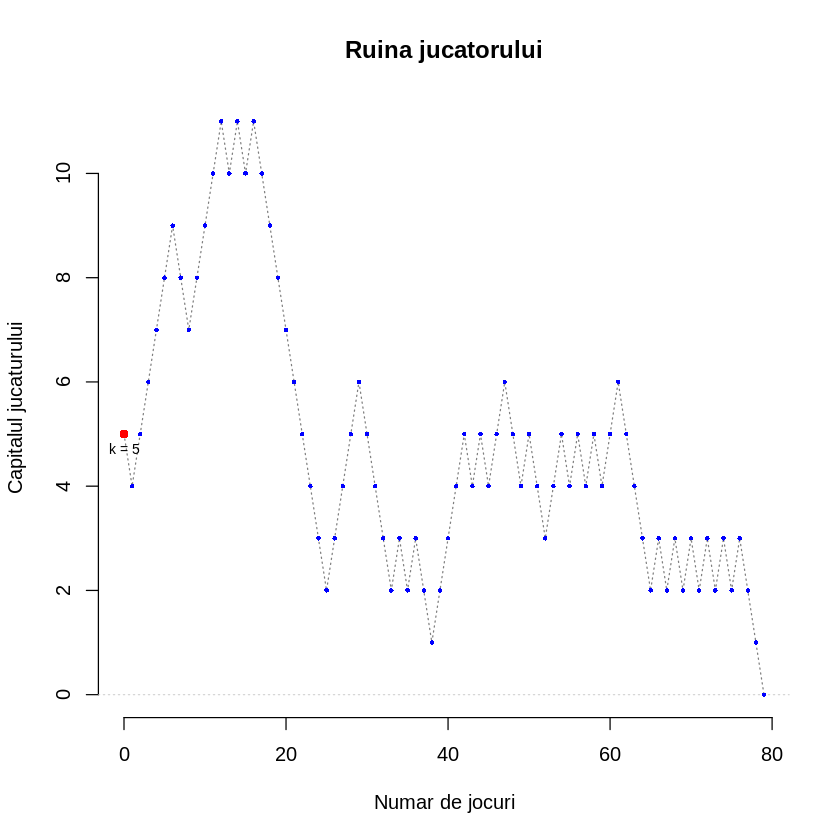

In [ ]:
ruina <- function(N, k){
  flag <- TRUE

  joc <- 0
  capital <- k
  y <- capital

  while(flag){
    x <- 2*rbinom(1,1,0.5)-1

    capital <- capital + x
    y <- c(y, capital)

    joc <- joc + 1

    if (capital == 0 || capital == N){
      flag = FALSE
    }
  }

  return(y) # daca am 0 este ruina altfel este succes
}

N <- 50
k <- 5

set.seed(1234)

y <- ruina(N, k)
joc <- length(y) - 1 # nr de jocuri

plot(0:joc, y, type = "l",
     main = "Ruina jucatorului",
     xlab = "Numar de jocuri",
     ylab = "Capitalul jucaturului",
     bty = "n",
     lty = 3, col = "grey50")
abline(h = c(0,N), col = "lightgrey", lty = 3)
points(0:joc, y, col = myblue,
       pch = 16,
       cex = 0.5)
points(0, k, col = myred, pch = 16)
text(0, k, labels = paste0("k = ", k), pos = 1, cex = 0.7)
cat("Ilustrarea evoluției jocului până se ajunge la ruină.")

# Dorim să repetăm experimentul de M = 1000 de ori (pentru valorile inițiale N = 50 și k = 5) și
# ne interesăm de câte ori jucătorul a ajuns la faliment.

N <- 50
k <- 5
M <- 1000

# Obs. - rezultatul functiei ruina trebuie modificat
joc <- replicate(M, ruina(N, k)) # repeta functia de M ori
proba_ruina <- sum(joc == 0)/M

O monedă are probabilitatea să pice cap p și să pice coadă q astfel ca  p+q=1. Moneda este aruncată succesiv și independent până când evenimentul A, am obținut două capete unul după altul sau două cozi una după alta, s-a realizat. Determinați numărul mediu de aruncări necesare realizării evenimentului de interes, A.



In [ ]:
flip_coins <- function(p){

  flip <- sample(c("H", "T"), 1, prob = c(p, 1-p))

  nflips <- 1
  flag <- TRUE

  while(flag){
    x <- sample(c("H", "T"), 1, prob = c(p, 1-p))

    nflips <- nflips + 1

    if (flip == x){
      flag <- FALSE
    }

    flip <- x
  }

  return(nflips)
}

flip_coins(0.2)

N <- 10000
p <- 0.3

rez_flips <- replicate(N, flip_coins(p))

[1] 6

In [ ]:
# Problema scrutinului

scrutin <- function(sd){
  set.seed(sd)
  # generam voturile
  vectscrutin = sample(c(rep("P",p),rep("Q",q)))
  # transformam in +-1
  vectscrutin = 2*(vectscrutin == "P") - 1
  # calculam s_k
  s <- cumsum(vectscrutin)
  # returnam daca avem sau nu indeplinita conditia
  sum(s>0) == p+q
}


LABORATOARE STATISTICA

[1] 7 6 7 5 4 7 4 7 4 6

[1] 0.01074219 0.05468750 0.17187500 0.37695313 0.62304687

[1] 0.009765625 0.043945312 0.117187500 0.205078125 0.246093750

[1] 4 5 6

[1] 0.492316050 0.089474206 0.691017530 0.104606450 0.010853291 0.568029565
 [7] 0.000961158 0.884589197 0.510916453 0.014442099

[1] 4.376557 3.048530 5.761958 6.723002 5.468446 6.250629 5.856431 6.454511
 [9] 2.908523 2.081357

[1] 4.550526 4.976855 3.670436 5.553415 5.307109 6.460076 2.387130 4.242570
 [9] 2.482295 2.533607

[1] 0.0 0.3 1.0 1.0

[1] 1 1 1 0

[1] 0.2 0.5 0.7

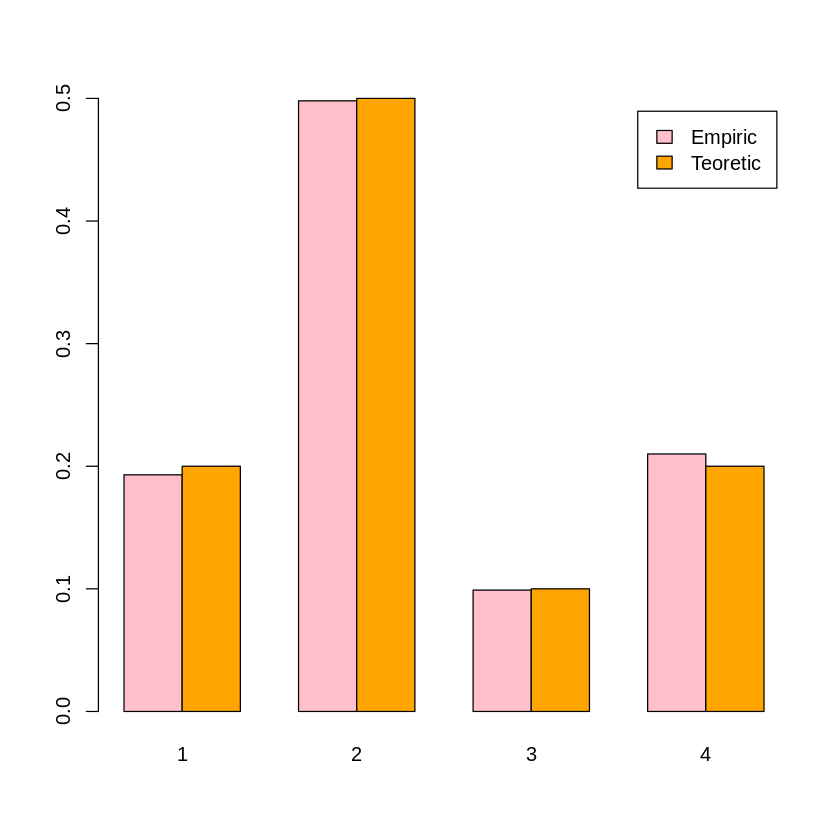

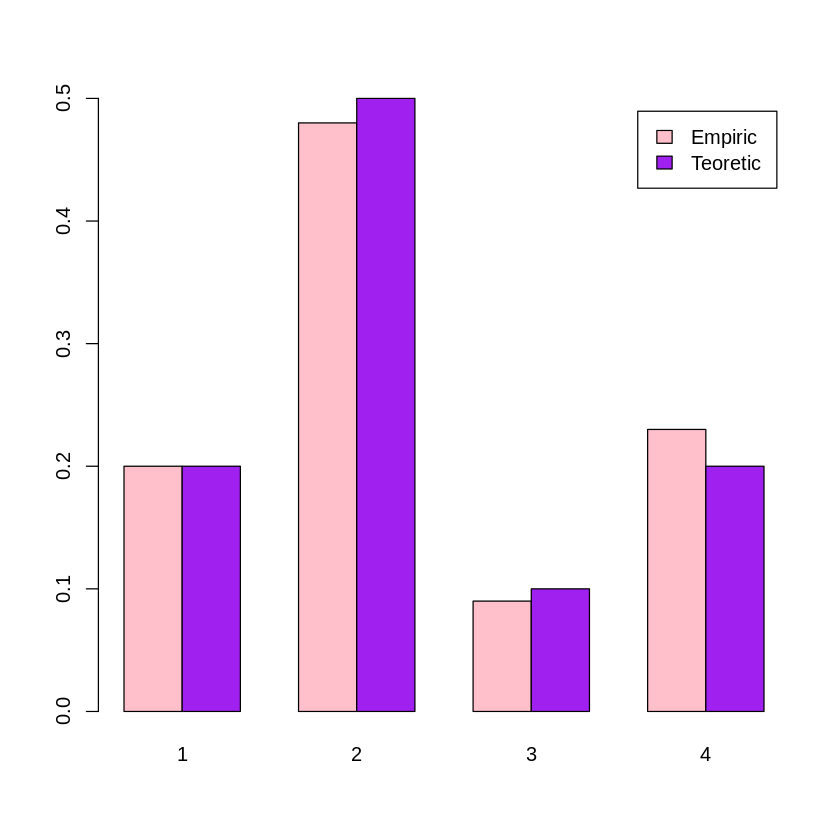

In [ ]:
### lab 5

# Functiile

# r_ =(random) permite generarea de observatii cu repartitia _
# p_ =(probability) permite calculul functiei de repartitie din repartitia _
# d_ =(density) permite calculul densitatii resp a fct de masa din repartitia _
# q_ =(quantile) permite calculul functiei cuantila din repartitia _, unde _ este numele abreviat al repartitiei

#Binomiala -caz discret-

#Bin(10,0.5)
rbinom(10,10,0.5)                    #gen 10 valori
pbinom(1:5,10,0.5)                   #primul arg poate sa fie un vector
                                     #Imi da F(1),F(2),...
dbinom(1:5,10,0.5)                   #calc fct de masa in fiecare pct (pt ca sunt pe caz discret)
qbinom(c(0.25,0.5,0.75),10,0.5)      #Calc F^-1 in pct date (fct cuantila)


#Uniforma

#U(0,1)
runif(10)                       #10 reprez nr de observatii
runif(10,2,7)                   #U(2,7)
2+(7-2)*runif(10)               #a+(b-a)*U(0,1) pentru a genera unif pe intervalul [a,b]
punif(c(0,0.3,2,6))
dunif(c(0.3,0.5,1,2))
qunif(c(0.2,0.5,0.7))

#Exemplu 1
n <- 1000
u <- runif(n)                           #obs repartizare unif pe (0,1)
                                        #Daca u>0.2 atunci x ia valoarea 2
x <- 1+(u>0.2) + (u>0.7) + (u>0.8)      #Daca u>(0.2+0.5) atunci x ia valoarea 3
                                        #Daca u>(0.2+0.5+0.1) atunci x ia valoarea 4
x_frecv <- table(x)/n            #frecv relativa
pE <- x_frecv                    #probabilitatea empirica
pT <- c(0.2,0.5,0.1,0.2)         #probabilitatea teoretica
valx <- c(1,2,3,4)
barplot(rbind(pE,pT),
        beside=TRUE ,
        col=c("pink","orange") ,
        names.arg=valx ,
        legend.text=c("Empiric","Teoretic"))

?table
# starting httpd help server ... done
# Generez o observatie dintr-o repartitie discreta de vect x si probab p
# n=nr de observatii generate

genDescrete <- function(n=1,x,p=rep(1/length(x),length(x))){
  lp <- length(p)
  lx <- length(x)
  if (lx!=lp){
    stop("vectorii sunt de lungimi diferite")
  }
  out <- rep(0,n)                    #se initializeaza cu n 0-uri vect out
  u <- runif(n)                      #se genereaza n obs din U(0,1)
  pCS <- cumsum(p)                   #vect probab sumelor cumulative; reprezinta capetele intervalelor
  for (i in 1:n){
           # determin intervalul minim
           # Pentru fiecare valoare generată aleator în u, se găsește primul index k pentru care valoarea din u
           # este mai mică sau egală cu suma cumulative corespunzătoare din p. Aceasta determină intervalul în
           # care se încadrează valoarea generată.
    k <- min(which(u[i] <= pCS))
           # Se atribuie valoarea corespunzătoare din vectorul x în vectorul out.
    out[i] <- x[k]
  }
  return(out)
}

x2 <- genDescrete(n=100,x=1:4,p=c(0.2,0.5,0.1,0.2))
pE2 <- table(x2)/length(x2)
valx2 <- c(1,2,3,4)
barplot(rbind(pE2,pT),
        beside=TRUE ,
        col=c("pink","purple") ,
        names.arg=valx2 ,
        legend.text=c("Empiric","Teoretic"))

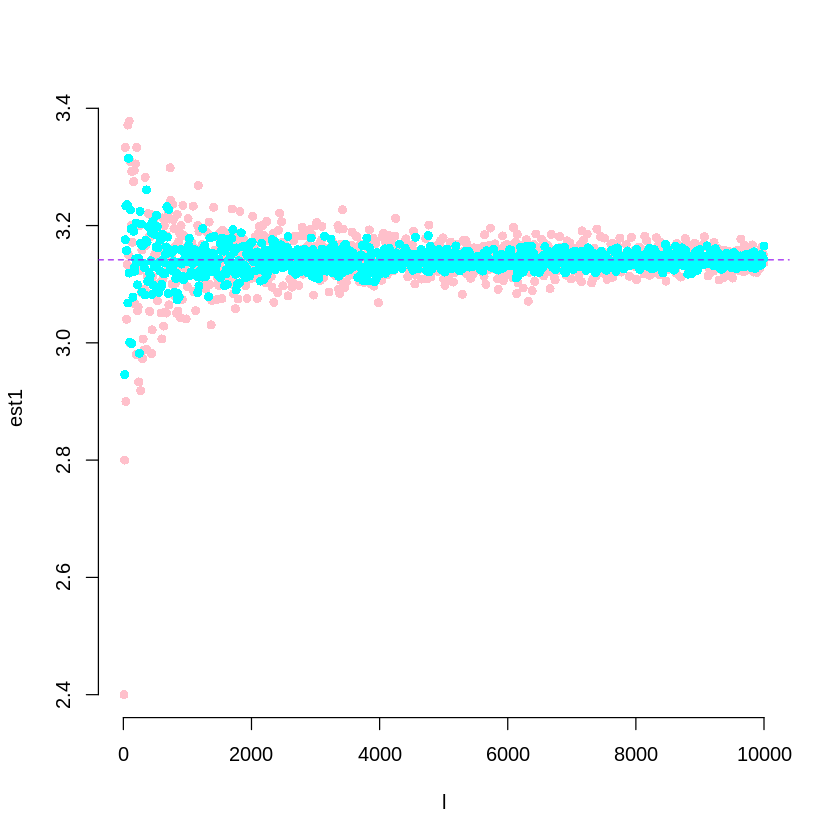

In [ ]:
### lab 6

#Estimarea lui 𝜋
#construim x
l <- seq(10,10000,by=10)
est1 <- rep(0,length(l))        #initializez vect pentru prima estimare
est2 <- rep(0,length(l))        #initializez vect pentru a 2-a estimare

for (i in 1:length(l)){
  u1 <- runif(l[i])             #ia length(l) val unif pentru u1
  u2 <- runif(l[i])             #ia length(l) val unif pentru u2
  v <- runif(l[i])

  x <- ifelse(u1**2+u2**2 <= 1, 1, 0) #ia val 1 daca e indepl cond din if, o altfel
  est1[i] <- 4*mean(x)                #calc 4\bar{x}_n

  y <- sqrt(1-v**2)
  est2[i] <- 4*mean(y)                #calc 4\bar{y}_n
}

plot(l,est1,
     type="p",
     pch=16,
     col="pink",
     bty="n")

points(l,est2,
     pch=16,
     col="cyan")

abline(h=pi,
       col="purple",
       lty=2)

x
    1     2     3     4     5     6     7     8     9    10 
0.106 0.103 0.095 0.091 0.091 0.097 0.111 0.100 0.102 0.104 

[1]  3  8  4  4 10  3  4  4  8  7  3  7  1  9  5 10  6  3  6  2  9  3  4  4
  [25]  2  8  4  2  7  4  8  9  5  1  1  3  1  1  2  7  2  6  7  7  7  3  3  3
  [49] 10  8  2  7  9  5  3  2  5  3  8 10  9  6  2  9  7  8  6  2  1  6 10  1
  [73]  8  5  4  6  4  6  9  2  7 10  6 10  6  8  3  8 10  6  2 10  1  1  4  7
  [97]  5  7  4  4  1  8  4  8  6  1  4 10  8  5  7  7  3 10  3  6 10  9  4  1
 [121]  5  7  6  7  9  4  7 10  8  4  1  5  3  9  5  8  8 10  3  1  3  5  4  4
 [145]  4  4  9 10 10  4  5  9  8  1  5  8  9 10  8 10  7  7  2  1  4  2  8  8
 [169]  1  7  7  1  6  5  1  4  8  7  1  8  8  7  9  5  9  4  9  7  2  6  7  7
 [193]  1  8  8  1  5  2 10  9 10  7  5  1  5  7  1  5  1  3  8 10  2  7  3  4
 [217]  2  1  5  1 10  9  5  1  7  5  5  9  8  9  8  9 10  2  6  9  9  7  3  7
 [241] 10  4  3  1  2  3  7  1  8  1  1  1  2  7  5  9  2  7 10  6  1  6  4  6
 [265]  1  4 10  7  5 10  6  9  3  5  6  3  3  5  1  9  8  9  5 10  9  4  3  4
 [289]  7  9  7  8  1  2  2 10  9  4  4  5  3  5  7  3  4  3 10  9  5  5  6  4
 [313]  4  7  5  2  7 10  4  9  5  5 10  7  2  1 10  7  4  1  6  1  9  3  8  5
 [337]  5  7  1  1  7  9  2  1  4  6  6  4  2  1  3  3  7  9  9  2 10 10  7 10
 [361] 10  2  2  1  4  4  2  9 10  1  6  4  8  2  4  9 10  8  6  7  4  9  5  1
 [385]  4  9  8  1  9  9  1  6  2  3  2  7  1  4  1  8  3  9  2  5  4  3  1  5
 [409]  1  2  1  5  5  3  7  6  8 10  6  6  4  2  8  4  2  2  3  5  7  1  1  1
 [433]  6  5  6  4  6  8  6  8  6  6  8  3  6  9  9  3 10  3  5  4  5  8 10 10
 [457]  1 10  5 10  4  6  9  6  9  6  8  6  1  9  7  7  3  8 10  5  4  9  9  7
 [481]  5  2  1  4  2  8 10  3  7  4  7  2  3  9  6  5  9  6  6  9  2  6 10  6
 [505]  5  1 10  2  1  7  4  5  1  2  2  9  8  8 10  6  5  1  3  9  6  2  3  3
 [529]  8  9  2  7 10  8  4  2  8  7  7  7  9  5  3  9  2  9  1 10  2  3  1  4
 [553]  2  8  8 10  3  5  2  3  1  9  4  9  8  1  2  8  8  4 10 10  2  2  9 10
 [577] 10  4  7 10  7  1  8  5  1  5  8  5  2  6  7  7  8  3  5  7  6  3 10  3
 [601] 10  4  6  8  6  7  7  9  6 10  2  3  6  6  3  5  5 10  9  6  6  1  2  2
 [625] 10  2  4  1 10  3  6  2  2  8 10 10  1  1  8  9  6  5  2  5  4  7  7  2
 [649] 10  3  9  9  8  8  3  9  9  6  8 10 10  8  3  4 10  6  2  7  4  7  9  6
 [673]  4  6 10 10  3  8 10  9 10  9  2  3 10  6  2  3  8  9  6  6  8  7  5  2
 [697]  7  6  9  8  1  8  5  2 10  9  4  6  5  8  1  1  2  3  4 10  3  1  5  1
 [721]  7  7  8  8  1  2  1  5  4 10  1 10  8  6 10  7 10  7  4  7  2  3  5  2
 [745]  1  1  8  9  4  3  2  2  8  1  8 10 10  8  2  2  3  7  7  9  9  1  3  3
 [769]  7  5  6 10  3  8  7 10  3  2  6 10  7  1  2  3  5  5  3 10  8  1  2 10
 [793]  8  4  9  6  4  5  6  4  5  7  6  6  5  9  4  3  3 10 10  7  9  6  1  9
 [817]  1  2  1 10  7  4  8  3  9  2  7  8  6  3  4  7  1  2  9  6  7  7  9  6
 [841]  3  9  7  1  9  5 10  9 10  9  1 10  3 10  6  7  2  8  9  6  4  4  7  5
 [865]  2  7  8  4  1 10  7  4  5  5  9  1  8  2 10  3  6 10  7  2 10  5  5  6
 [889]  5  8  4  6  9  3  8  8  4  5  7  6  9  7  6  3  2  9  6  2  8  9  6  8
 [913]  7  9  2  7 10  3  7  9  2  7  4 10  7 10  7  8  9  2  3  5  6  3  6  4
 [937]  2  6  3  9  6  9  9  8  1  3  1  1  8  6  8  8  5  6  1 10  2  2  7  3
 [961]  1  4  2  4  2  7  3  8  5  3  9  2  6  3  5  1 10  5  7  3  3  3  3  2
 [985]  2  5  1  2  4  8  8  1  2  1  5  1  7  5  7  7

Warning message in rbind(pE, pT):
“number of columns of result is not a multiple of vector length (arg 1)”


pE,0.0140000000,0.040000000,0.11700000,0.2060000,0.2610000,0.1960000,0.1180000,0.0420000,0.00600000,0.014000000,0.0400000000
pT,0.0009765625,0.009765625,0.04394531,0.1171875,0.2050781,0.2460938,0.2050781,0.1171875,0.04394531,0.009765625,0.0009765625


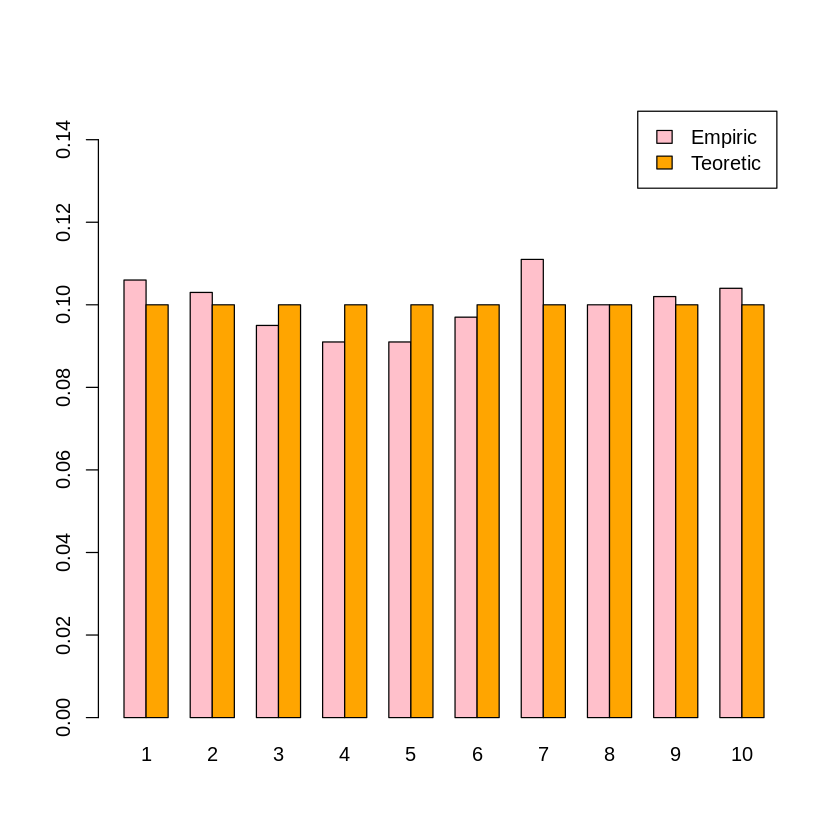

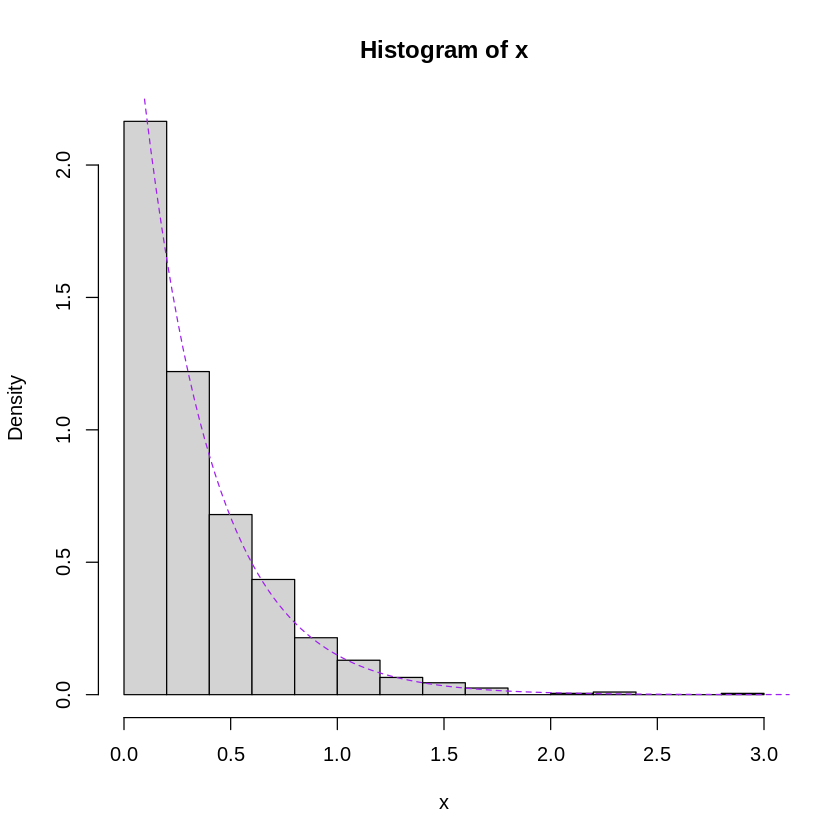

In [1]:
### lab 7 --------------------- Important pentru test

#V. a. uniforme discrete
gen_unif_discrete <- function(n=10000,N=10){
                      #n=nr de observatii
                      #N={1,2,3,...,N} (suportul repartitie)
  u <- runif(n)       #vect de uniforme pe [0,1]
  x <- floor(N*u)+1
  return(x)
}
?floor
#test
x <- gen_unif_discrete(1000,10)
table(x)/length(x)                 #frecv relative
x
pE <- table(x)/length(x)           #grafic
pT <- rep(1/10,10)

barplot(rbind(pE,pT),
        beside=TRUE,
        col=c("pink","orange"),
        legend.text=c("Empiric","Teoretic"),
        ylim=c(0,0.15))

#V. a. binomiala

gen_bin <- function(n=100,size=10,p=0.5){         #size si p reprez param B(n,p)
  x <- rep(0,n)              #n=nr de observatii
  f0 <- (1-p)^size
  r <- p/(1-p)
  for (i in 1:n){
    u <- runif(1)
    pb <- f0
    Fr <- pb                 #functia de repartitie
    while(u>=Fr){
      pb <- (size-x[i])/(x[i]+1)*r*pb
      Fr <- Fr+pb
      x[i] <- x[i]+1
    }}
  return(x)
}

#test
x <- gen_bin(1000,10,0.5)
pE <- table(x)/length(x)
pT <- dbinom(0:10,10,0.5)
rbind(pE,pT)
#abs(pE-pT)

gen_exp <- function(n=100,lambda=1){
  u <- runif(n)                          #Pentru o variabila continua graficul o sa fie o histograma
  x <- -log(u)/lambda
  return(x)
}

x <- gen_exp(1000,lambda=3)              #grafic
hist(x, probability=TRUE)
t <- seq(0,5,length.out=200)
y <- dexp(t,rate=3)
lines(t, y, col="purple", lty=2)         #Suprapun date peste un grafic deja existent


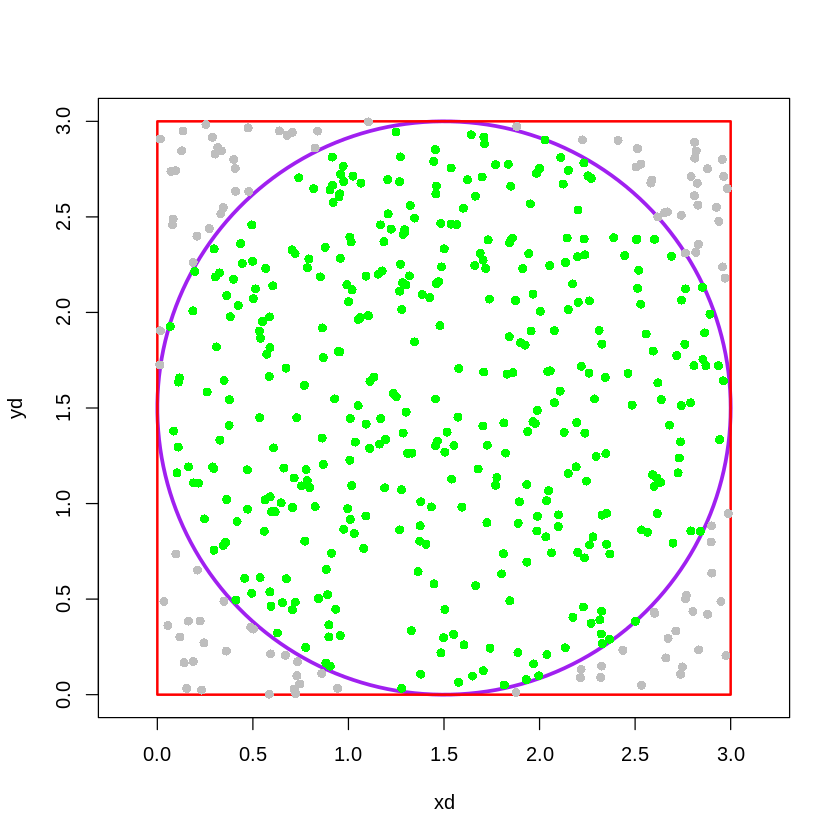

[1] -0.001239545

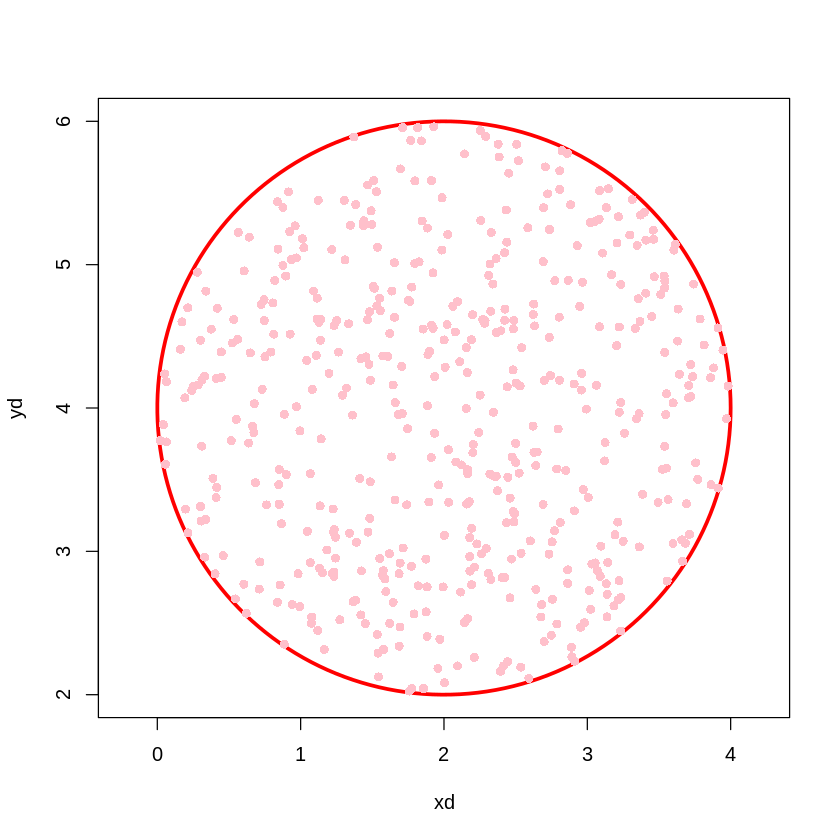

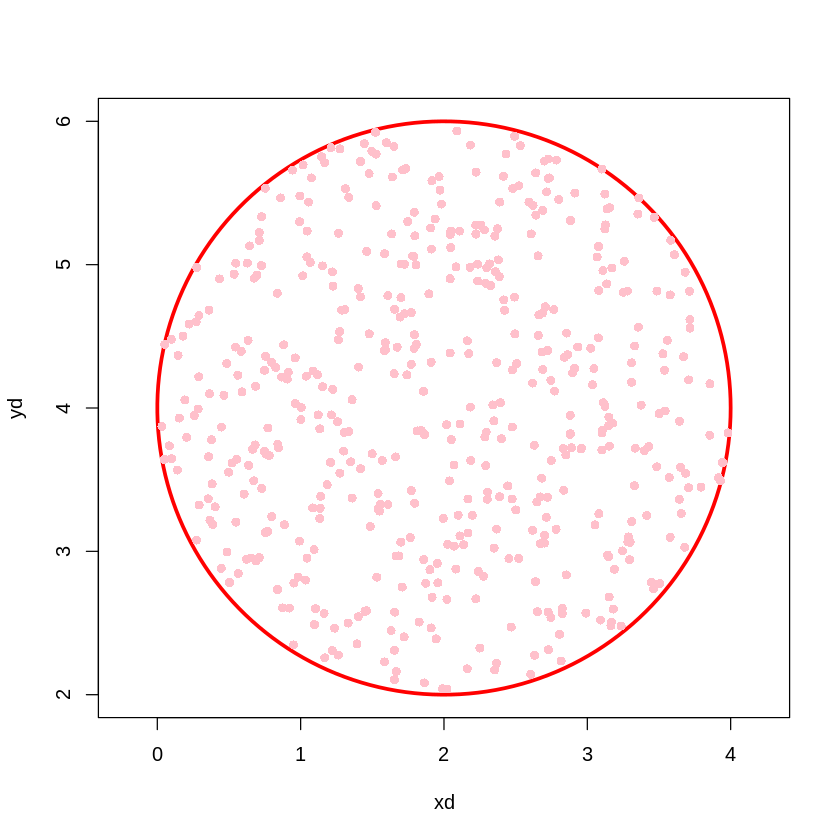

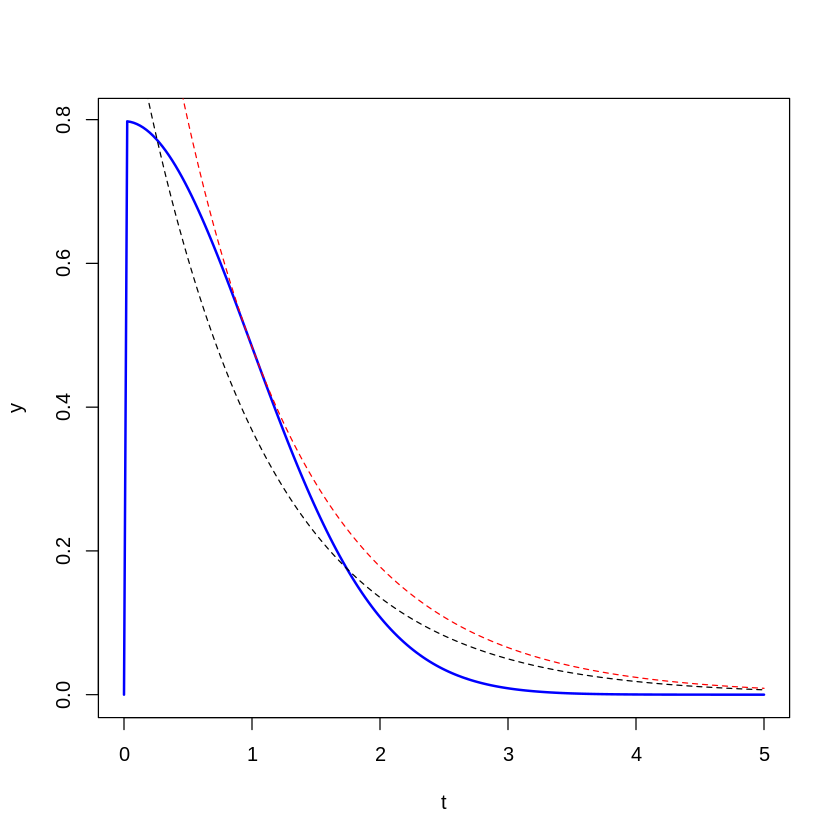

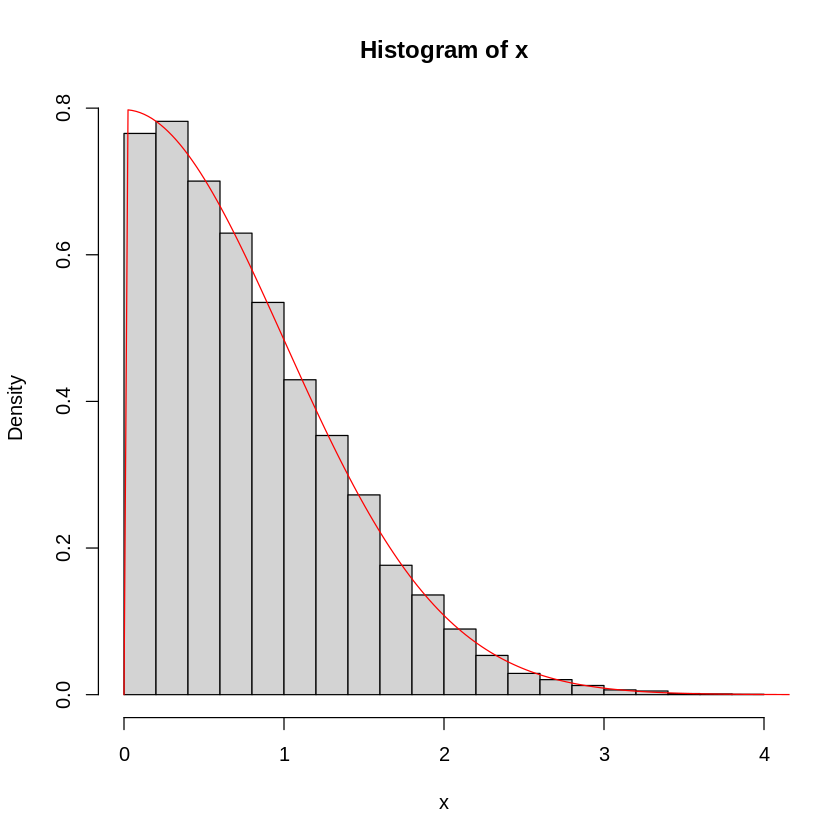

In [ ]:
### lab 8

#Generam puncte uniform repartizate pe disc
L <- 3
R <- L/2    #desenam cercul
theta <- seq(0,2*pi,length.out=200)
xd <- R+R*cos(theta)
yd <- R+R*sin(theta)

plot(xd, yd, type="l", lwd=3, col="purple", asp=1, xlim=c(0,L), ylim=c(0,L))

rect(0,0,L,L, border="red", lwd=2)

#Generam uniforme pe dreptunghi
n <- 500
x <- L*runif(n)
y <- L*runif(n)
points(x, y, col="grey", pch=16)

#Generam uniforme pe disc
l <- (x-R)^2+(y-R)^2
ind <- l<=R^2
xc <- x[ind]
yc <- y[ind]
points(xc, yc, col="green", pch=16)

#Functie care genereaza puncte repartizate uniform pe disc
gen_unif_disc <- function(n=10,R=2,xc=0,yc=0){
  out <- matrix(0,ncol=3,nrow=n)
  for (i in 1:n) {
    l <- R^2+1
    j <- 0
    while(l>R^2){
      ux <- -R+2*R*runif(1)
      uy <- -R+2*R*runif(1)
      l <- ux^2+uy^2
      j <- j+1
    }
    out[i,] <- c(ux+xc, uy+yc, j)
  }
  return(out)
}

#test
xc <- 2
yc <- 4
R <- 2
z <- gen_unif_disc(500, R=R, xc=xc, yc=yc)

theta <- seq(0,2*pi,length.out=200)
xd <- xc+R*cos(theta)
yd <- yc+R*sin(theta)

plot(xd, yd, type="l", lwd=3, col="red", asp=1)
points(z[,1], z[,2], col="pink", pch=16)

mean(z[,3]-4/pi)

gen_unif_disc2 <- function(n=10,R=2,xc=0,yc=0){
  r <- R*sqrt(runif(n))
  theta <- 2*pi*runif(n)
  x <- xc+r*cos(theta)
  y <- yc+r*sin(theta)
  return(cbind(x,y))
}

#test
xc <- 2
yc <- 4
R <- 2
z <- gen_unif_disc2(500, R=R, xc=xc, yc=yc)

theta <- seq(0,2*pi,length.out=200)
xd <- xc+R*cos(theta)
yd <- yc+R*sin(theta)

plot(xd,yd, type="l", lwd=3, col="red", asp=1)
points(z[,1],z[,2], col="pink", pch=16)

#Generam jumatate de normala
f <- function(x){
  return((x>0)*2*dnorm(x,0,1))
}

t <- seq(0,5,length.out=200)
y <- f(t)
plot(t,y, type="l", lwd=2, col="blue")

g <- function(x){
 return(dexp(x,1))
}
y2 <- g(t)
lines(t,y2,lty=2)
cst <- sqrt(2*exp(1)/pi)

y3 <- cst*y2
lines(t,y3,lty=2,col="red")

rhalf_normal <- function(n){
  out <- numeric(n)
  i <- 0
  while(i<n){
    u <- runif(1)
    x <- rexp(1)
    if(cst*g(x)*u<=f(x)){
      i <- i+1
      out[i] <- x
    }
  }
  return(out)
}
x <- rhalf_normal(10000)
hist(x, probability=TRUE)
lines(t,y,col="red")

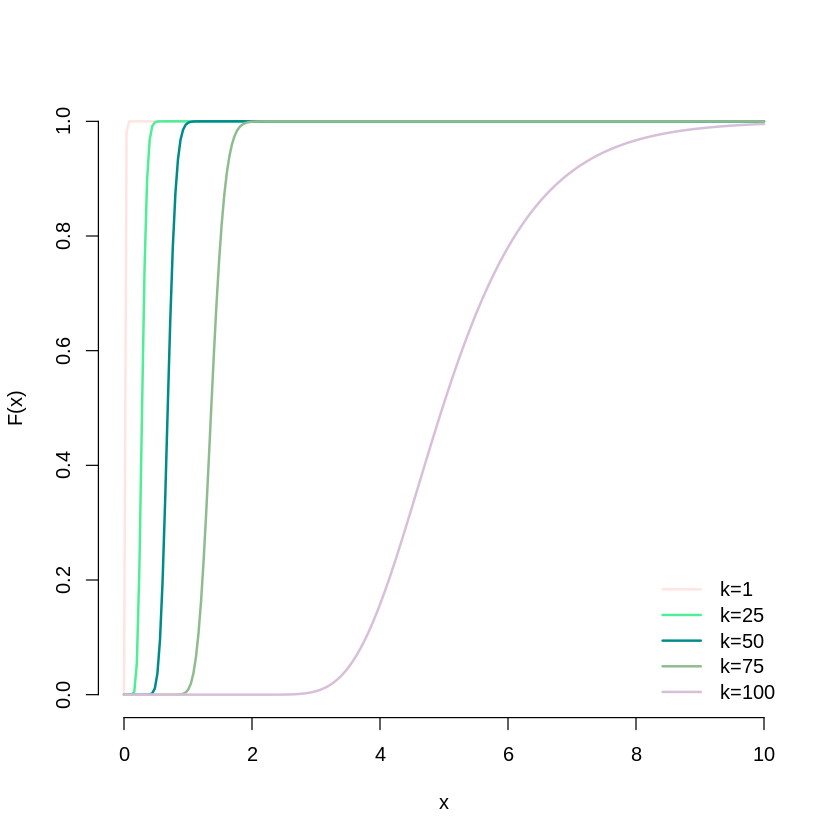

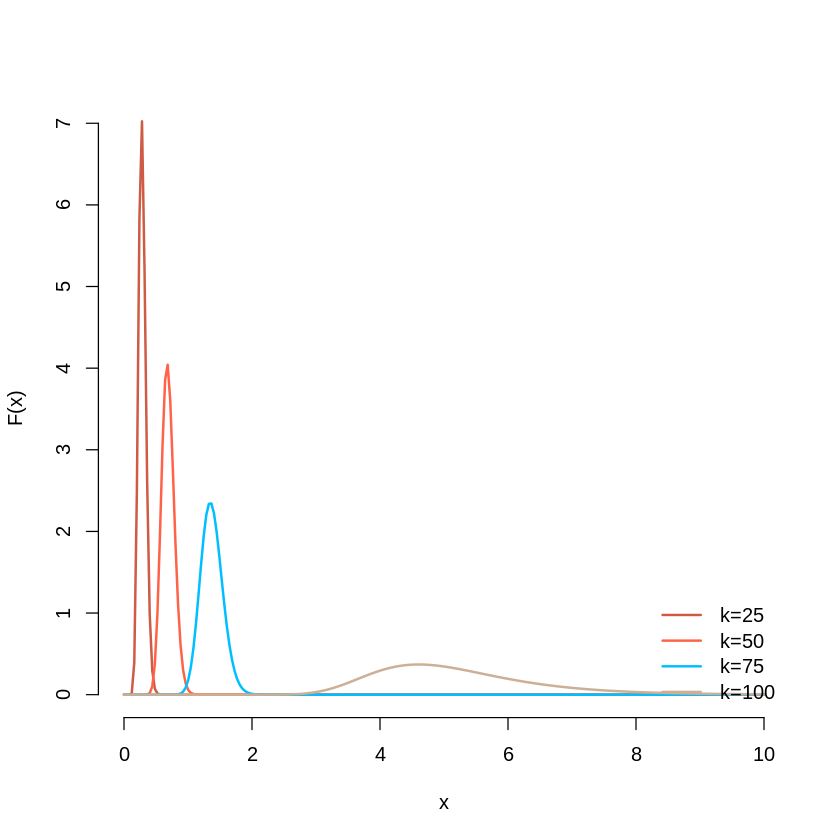

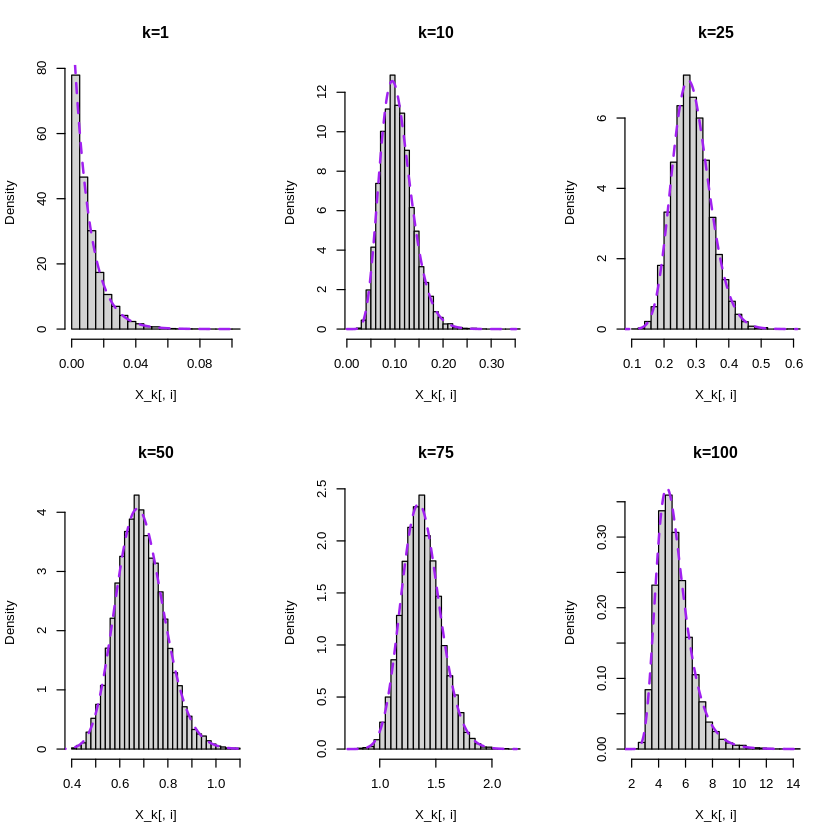

In [ ]:
### lab 9

##Exemplul 1 ------------- Functia de repartitie corespunzatoare X_k

cdf_stat_ord <- function(x,n=1,k=1,lambda=1){   #pentru Exponentiala
  if(k>n){                                      #n = nr esantionului, k = ordinul
    stop("Ordinul este prea mare")
  }
  Fx <- 0
  for (j in k:n){
    Fx <- Fx+choose(n,j)*pexp(x,lambda)^j*pexp(x,lambda,lower.tail = FALSE)^(n-j)
  }
  return(Fx)
}

# Ilustram grafic pentru un esantion de volum 100 si k ia valorile 1,25,50,75,100 n=100
# si k∈{1,25,50,75,100}

n <- 100
k <- c(1,floor(n/4),floor(n/2),floor(3*n/4),n)
lambda <- 1
x <- seq(0,10,length.out=250)
y <- cdf_stat_ord(x,n,k[1],lambda)
plot(x,y,
     type='n',
     xlab="x",
     ylab="F(x)",
     bty="n",
     lwd=2)
cols <- colors()[sample(1:657,length(k))]
for (i in 1:length(k)){
  lines(x,
        cdf_stat_ord(x,n,k[i],lambda),
        lwd=2,
        col=cols[i])}

legend("bottomright",
       legend=paste0("k=",k),
       lwd=2,
       col=cols,
       bty="n")

# Functia de densitate corespunzatoare X_k

pdf_stat_ord <- function(x,n=1,k=1,lambda=1){
  if(k>n){
    stop("Ordinul este prea mare")
  }
  fx <- k*choose(n,k)*dexp(x,lambda)*pexp(x,lambda)^(k-1)*pexp(x,lambda,lower.tail = FALSE)^(n-k)
  return(fx)
}

n <- 100
k <- c(floor(n/4),floor(n/2),floor(3*n/4),n)
lambda <- 1
x <- seq(0,10,length.out=250)
y <- pdf_stat_ord(x,n,k[1],lambda)
#Trasez un grafic gol
plot(x,y,
     type='n',
     xlab="x",
     ylab="F(x)",
     bty="n",
     lwd=2)
cols <- colors()[sample(1:657,length(k))]
for (i in 1:length(k)){
  lines(x,
        pdf_stat_ord(x,n,k[i],lambda),
        lwd=2,
        col=cols[i])}

legend("bottomright",
       legend=paste0("k=",k),
       lwd=2,
       col=cols,
       bty="n")

# Compararea repartitiei empirice cu cea teoretica

n <- 100
k <- c(1,10,25,50,75,100)
lambda <- 1
N <- 10000
X_k <-matrix(0,nrow=N,ncol=length(k))
for (i in 1:N){
  x <- rexp(n,lambda)
  x_sortat <- sort(x)
  X_k[i,] <- x_sortat[k]
}
par(mfrow=c(2,3))
for (i in 1:length(k)){
  hist(X_k[,i],
       probability=TRUE,
       breaks=30,
       main=paste0("k=",k[i]))
  x <- seq(0,max(X_k[,i]),length.out=250)
  lines(x,pdf_stat_ord(x,n,k[i],lambda),
        lwd=2,
        col="purple",
        lty=2)
}

[1] "v.a. binomiala"


,0,1,2,3,4,5,6,7,8,9,10
pE,0.0020000000,0.006000000,0.03900000,0.1280000,0.1970000,0.2360000,0.1920000,0.1380000,0.04800000,0.012000000,0.0020000000
pT,0.0009765625,0.009765625,0.04394531,0.1171875,0.2050781,0.2460938,0.2050781,0.1171875,0.04394531,0.009765625,0.0009765625


[1] "v.a. bernoulli"
[1] "v.a. geometrica"


Warning message in rbind(pE, pT):
“number of columns of result is not a multiple of vector length (arg 2)”


,0,1,2,3,4,5,6,7,8,9,10,11
pE,0.479,0.24,0.143,0.0600,0.03900,0.021000,0.0050000,0.00800000,0.001000000,0.0020000000,0.0010000000,0.001
pT,0.500,0.25,0.125,0.0625,0.03125,0.015625,0.0078125,0.00390625,0.001953125,0.0009765625,0.0004882812,0.500


[1] "v.a. binomiala negativa"


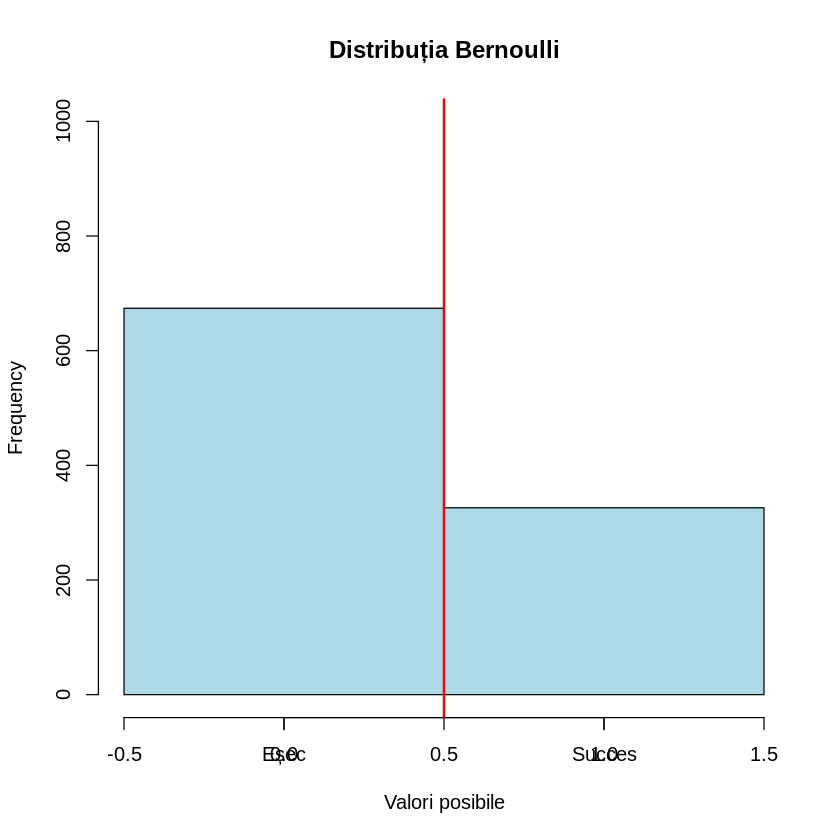

In [ ]:
# GENERAREA DE VARIABILE ALEATOARE DISCRETE

#%% BINOMIALA

gen_binomiala <- function(n = 100, size = 10, p = 0.5){
  #B(n, p) = B(size, p)
  # n este nr de observatii
  x <- rep(0, n)
  f0 <- (1-p)^size
  r <- p/(1-p)
  for(i in 1:n){
    u <- runif(1)
    pb <- f0   #probabilitatea
    Fr <- pb   #functia de repartitie
    while(u >= Fr){
      pb <- (size-x[i])/(x[i]+1)*r*pb
      Fr <- Fr + pb
      x[i] <- x[i] + 1
    }
  }
  return(x)
}

#test
print("v.a. binomiala")
x <- gen_binomiala(1000, 10, 0.5)
pE <- table(x)/length(x)
pT <- dbinom(0:10, 10, 0.5)
rbind(pE, pT)
#abs(pE - pT)

#%% BERNOULLI

gen_bernoulli <- function(n, p){
  x <- rbinom(n, 1, p)
  return(x)
}
print("v.a. bernoulli")
# Test pentru distribuția Bernoulli cu p = 0.3 și generarea a 1000 de variabile
x_bernoulli <- gen_bernoulli(1000, 0.3)

# Afișează histograma de densitate
hist(x_bernoulli, breaks = c(-0.5, 0.5, 1.5), col = 'lightblue', border = 'black', ylim = c(0, 1000),
     main = "Distribuția Bernoulli", xlab = "Valori posibile")

# Adaugă axa verticală pentru claritate (opțional)
axis(1, at = c(0, 1), labels = c("Eșec", "Succes"))

# Adaugă linie pentru probabilitatea teoretică p
abline(v = 0.5, col = "red", lwd = 2)

#%% GEOMETRICA

gen_geometrica <- function(n = 100, p = 0.5){
  # n este nr de observatii
  x <- rep(0, n)
  for(i in 1:n){
    u <- runif(1)
    pb <- p   # probabilitatea
    Fr <- pb   # functia de repartitie
    while(u >= Fr){
      x[i] <- x[i] + 1
      pb <- (1 - p) * pb  # actualizeaza probabilitatea pentru urmatoarea incercare
      Fr <- Fr + pb
    }
  }
  return(x)}

print("v.a. geometrica")
# Test
x <- gen_geometrica(1000, 0.5)
# Calculul probabilităților empirice și teoretice pentru comparație
pE <- table(x) / length(x)
pT <- dgeom(0:10, 0.5)
rbind(pE, pT)
#abs(pE - pT)

#%% BINOMIALA NEGATIVA

gen_binom_negativa <- function(n = 100, size = 10, p = 0.5){
  #BinN(n, p) = BinN(size, p)
  # n este nr de observatii
  x <- rep(0, n)
  for(i in 1:n){
    u <- runif(1)
    pb <- (1 - p) ^ size   #probabilitatea
    Fr <- pb   #functia de repartitie
    while(u >= Fr){
      pb <- (size-x[i])*p*pb/(x[i] + 1)
      Fr <- Fr + pb
      x[i] <- x[i] + 1
    }
  }
  return(x)
}

#test
print("v.a. binomiala negativa")
x <- gen_binom_negativa(1000, 10, 0.5)
pE <- table(x)/length(x)
pT <- dnbinom(0:10, 10, 0.5)
rbind(pE, pT)
#abs(pE - pT)

#%% POISSON

gen_Poisson <- function(n = 100, lambda = 1){
    u <- runif(n)  # Vector de uniforme
    x <- rep(0, n)  # Inițializează vectorul rezultatelor
    for(i in 1:n){
        p <- exp(-lambda)  # Probabilitatea x = 0
        F <- p  # Funcția de repartiție inițială
        k <- 0  # Variabila de contor pentru x
        while(u[i] >= F){
            k <- k + 1
            p <- p * lambda / k  # prob x = k
            F <- F + p
        }
        x[i] <- k  # Salvează valoarea lui x generată
    }
    return(x)
}

print("v.a. Poisson")
x <- gen_Poisson(1000, lambda = 1)
hist(x, probability = TRUE)  # Histograma de densitate

# Suprapune datele pe un grafic deja existent
t <- seq(0, 20, length.out = 200)
y <- dpois(t, lambda = 1)

lines(t, y,
      col = 'pink',
      lty = 2,
      lwd = 3)


x
    1     2     3     4     5     6     7     8     9    10 
0.104 0.097 0.105 0.085 0.113 0.098 0.116 0.092 0.094 0.096 

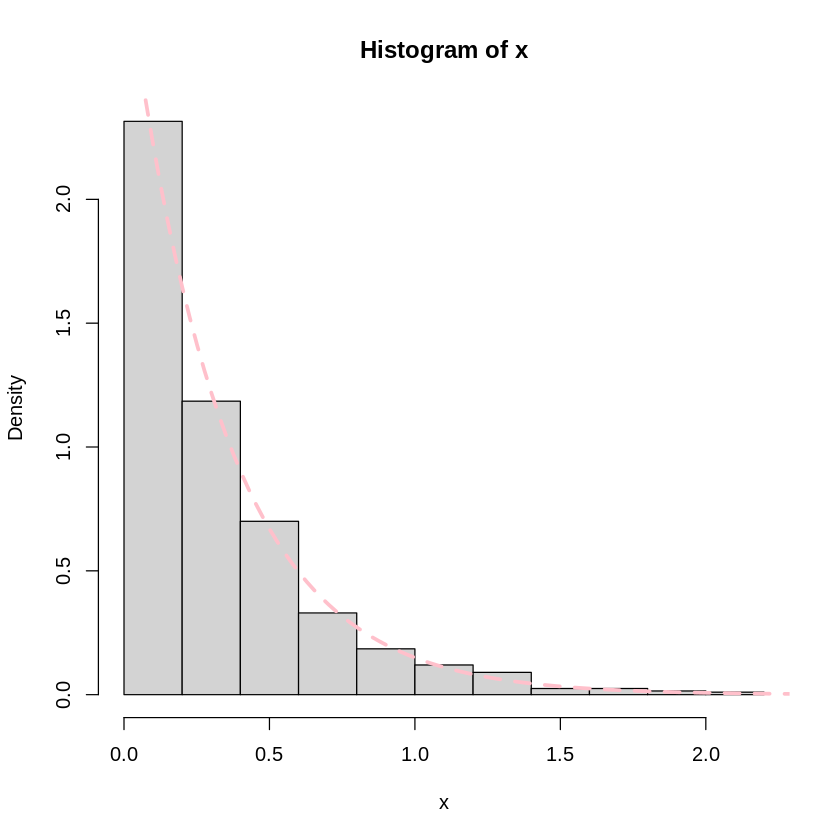

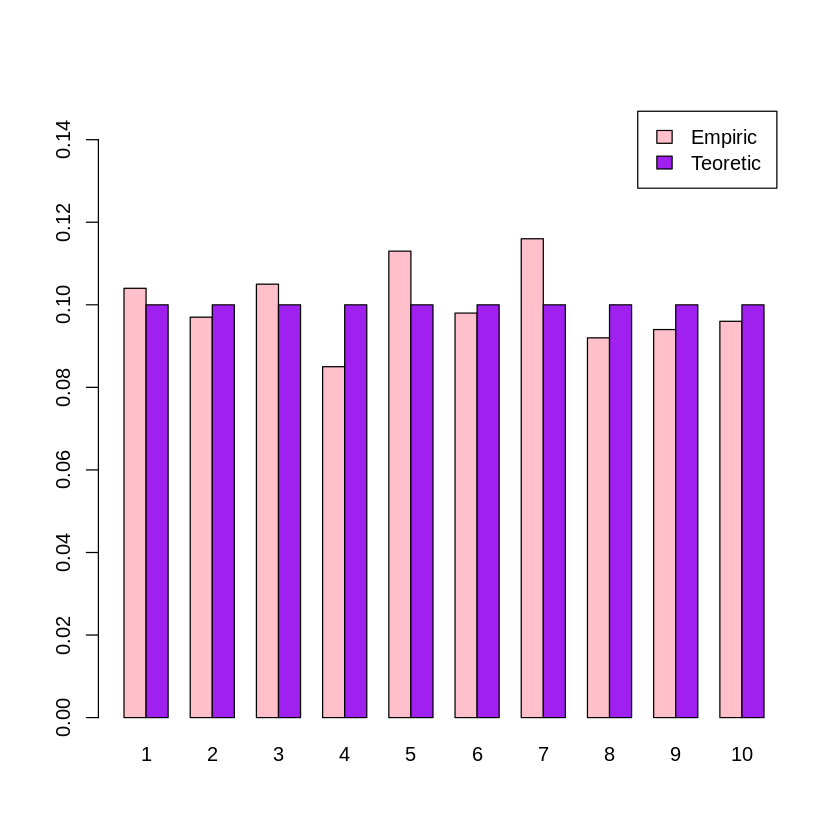

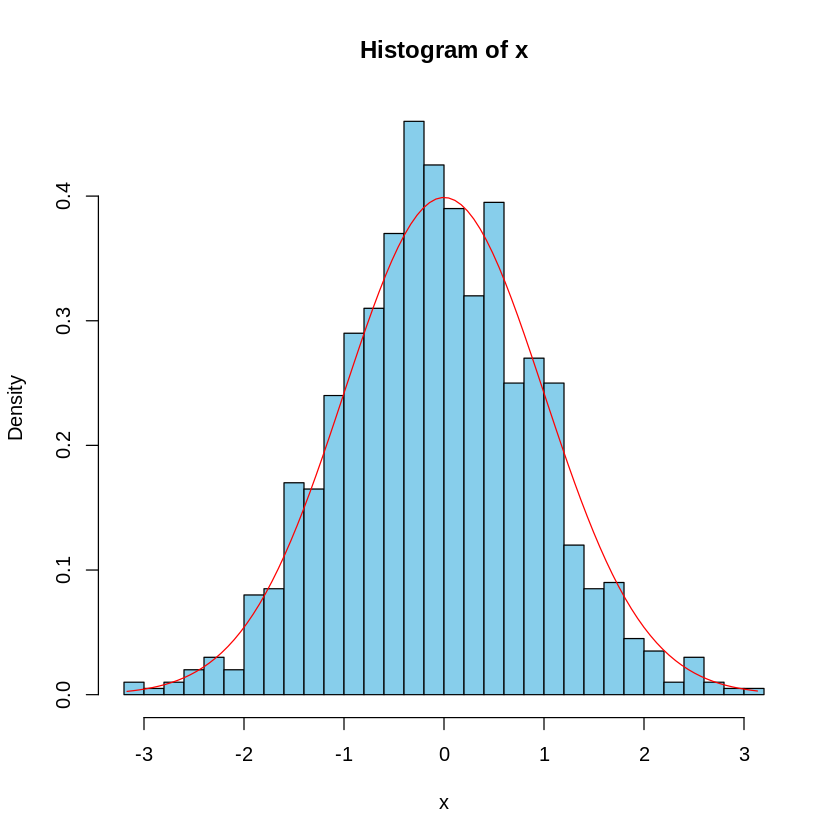

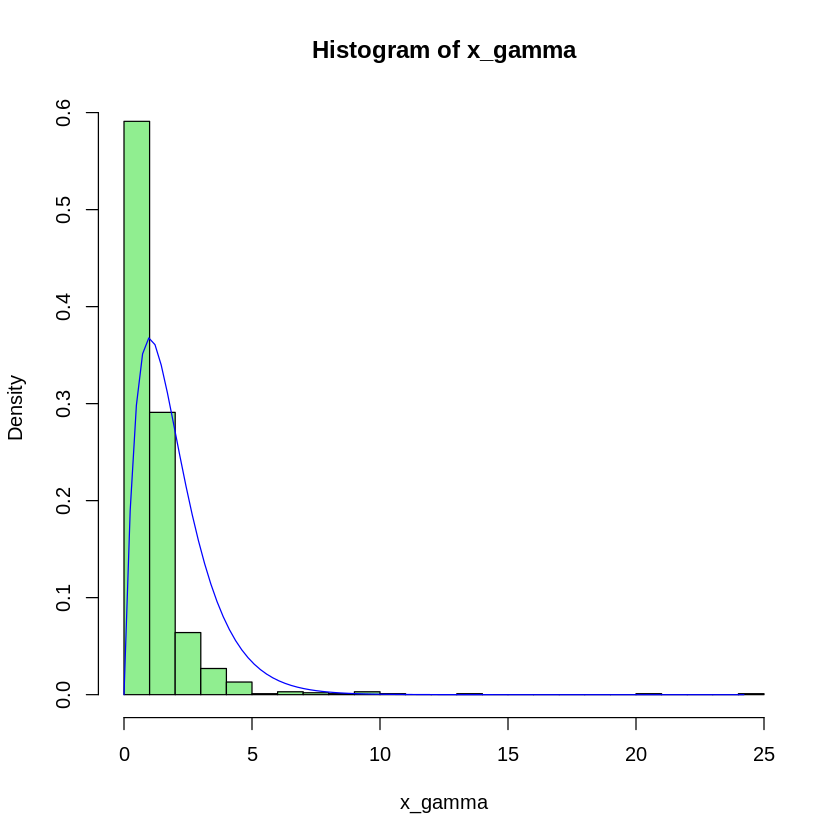

In [ ]:
# GENERAREA DE VARIABILE ALEATOARE CONTINUE

#%% EXPONENTIALA

gen_exponentiala <- function(n = 100, lambda = 1){
  u <- runif(n)  #vect de uniforme
  x <- -log(u)/lambda
  return(x)
}
#daca nu folosim probability = TRUE, o sa avem histograme de frecventa
x <- gen_exponentiala(1000, lambda = 3)
hist(x, probability = TRUE)  #distograma de densitate

#suprapun date peste un grafic deja existent
t <- seq(0, 5, length.out = 200)
y <- dexp(t, rate = 3)  #rate = lambda  #densitatea exponentialei

lines(t, y,
      col = 'pink',
      lty = 2,
      lwd = 3)
?dexp
# dexp <- functia de densitate
# pexp <- functia de repartitie
# qexp <- functia cuantila
# rexp <- genereaza random deviates

#&& UNIFORMA


gen_unif_discrete <- function(n=100, N=10){
  # n <- nr de observatii
  # N <- {1, 2, 3, ...} suportul repartitiei
  u <- runif(n)   # vectorul de uniforme oe [0, 1]
  x <- floor(N*u) + 1
  return(x)
}

#test
x <- gen_unif_discrete(1000, 10)
table(x)/length(x)  #frecventa relativa

# grafic
pE <- table(x)/length(x)
pT <- rep(1/10, 10)
barplot(rbind(pE, pT),
        beside = TRUE,
        col = c('pink', 'purple'),
        legend.text = c('Empiric', 'Teoretic'),
        ylim = c(0, 0.15))

#%% NORMALA

gen_normala_continua <- function(n = 100){
  u1 <- runif(n)
  u2 <- runif(n)
  z1 <- sqrt(-2 * log(u1)) * cos(2 * pi * u2)
  return(z1)
}

# Test
x <- gen_normala_continua(1000)

# Grafic
hist(x, probability = TRUE, breaks = 30, col = 'skyblue', border = 'black')

# Suprapune densitatea teoretică a distribuției normale standard
curve(dnorm(x), from = min(x), to = max(x), col = 'red', add = TRUE)

#%% GAMMA

gen_gamma <- function(n, shape, scale){
  u <- runif(n)
  x <- rep(0, n)

  for(i in 1:n){
    b <- (exp(1) + shape) / exp(1)
    if(shape > 1){
      a = shape - 1
      c = 3 * shape - 0.75
    } else {
      a = shape
      c = 1 / (9 * shape)
    }
    u1 = runif(1)
    u2 = runif(1)
    v = log(u1 / (1 - u1)) / b
    x[i] = a * exp(v)
    z = u1^2 * u2
    r = c * v^2 * u2
    accept = (r <= 1 - 0.0331 * (v^2)^2) || (log(z) <= 0.5 * v^2 + b * (1 - r + log(r)))
    if(!accept){
      x[i] = 0
    }
  }
  return(scale * x)
}

# Test pentru distribuția Gamma cu parametrii shape = 2 și scale = 1
x_gamma <- gen_gamma(1000, 2, 1)

# Afișează histograma de densitate
hist(x_gamma, probability = TRUE, breaks = 30, col = 'lightgreen', border = 'black')

# Suprapune densitatea teoretică a distribuției Gamma
curve(dgamma(x, shape = 2, scale = 1), from = min(x_gamma), to = max(x_gamma), col = 'blue', add = TRUE)
